# 1. Supporting notebooks used in preparation for EDA: 

- Notebook used for the addition of new variables to the dataset following the cleaning process. The neighborhood variable was added using Python's *reverse_geocoder* library. The spped, road congestion and road length variables were extracted using the Tomtom and HERE APIs. https://github.com/saychelsea11/Springboard-Projects/blob/master/Capstone1_Project/adding_neighborhood_speed_and_road_variables.ipynb
- Notebook used for some additional cleaning and formatting. Categories for the weather variables were reformatted, the severity variable was converted to binary classes with the 'unknown' category being removed. https://github.com/saychelsea11/Springboard-Projects/blob/master/Capstone1_Project/binary_class_conversion_handling_unknown_category.ipynb

# 2. Dataset used for EDA: 
- https://drive.google.com/open?id=1L56KJohJ086r17Uqv8IXk7QiP2tg46Ue

# 3. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from collections import Counter

In [2]:
df_binary = pd.read_csv('completely_cleaned_dataset.csv',index_col=0)
df_binary.head()

Longitude   Latitude   Status Address Type Severity Description  \
0 -122.292141  47.536087  Matched        Block           Not Severe   
1 -122.335422  47.598752  Matched        Block           Not Severe   
2 -122.331579  47.598746  Matched        Block           Not Severe   
3 -122.334188  47.571578  Matched        Block           Not Severe   
5 -122.337348  47.520472  Matched        Block           Not Severe   

  Collision Type  Number of People Involved  Number of Pedestrians Involved  \
0      Sideswipe                          2                               0   
1          Other                          1                               0   
2      Sideswipe                          2                               0   
3          Other                          2                               0   
5      Sideswipe                          2                               0   

   Number of Bicycles Involved  Number of Vehicles Involved  ...  Year  Month  \
0                            0                            2  ...  2018     12   
1                            0                            1  ...  2018     12   
2                            0                            2  ...  2018     12   
3                            0                            1  ...  2018     12   
5                            0                            2  ...  2018     12   

   Date Hour Minute Speed Road Congestion Road Length  Neighborhood  \
0    12   15     49  48.0         2.36674     0.56104      Riverton   
1    16    2     44  85.0        -1.00000     0.36276       Seattle   
2    17   13     26  13.0        -1.00000     0.36276       Seattle   
3    20    2     25  58.0         0.00000     1.73291       Seattle   
5    14   17     33  55.0         1.57819     0.74738  White Center   

  Num People Square  
0                 4  
1                 1  
2                 4  
3                 4  
5                 4  

[5 rows x 32 columns]

The cleaned and formatted dataset appears to be loaded in properly. We can now proceed with the exploratory data analysis.

# 4. Visualizing crash locations using Folium

In this section, the coordinates are used to visualize the crash locations across Seattle in order to get an idea of the areas of high collision density as well as areas of greater severity. 

We are looking for answers to the following questions: 
- Which neighborhoods in Seattle are the most prone to collisions? 
- Where do the more severe collisions tend to happen in the city? 
- Is there an obvious connection between geographical location and collision severity? 

Below, we create a dataframe with the coordinates for each neighborhood so that we can visualize them on the map as well. 

In [3]:
#Creating a dataframe of the neighborhoods
neighborhoods = pd.DataFrame()
neighborhoods['neighborhood'] = df_binary['Neighborhood'].value_counts()

#Manually entering the coordinates for each neighborhood
neigh_tuples = [(47.6062, -122.3321),(47.7560,-122.3457),(47.5086,-122.3551),(47.7601,-122.2840),(47.4938, -122.2382),(47.4958,-122.3105),(47.5707,-122.2221),(47.4958,-122.3105),(47.7141, -122.2403),(47.6462,-122.2173),(47.6248,-122.2361),(47.4740,-122.2610),(47.6769,-122.2060)]

#Combining the coordinates with the neighborhood names in one dataframe
neigh_tuples = list(zip(*neigh_tuples))
neighborhoods['lat'] = neigh_tuples[0]
neighborhoods['lon'] = neigh_tuples[1]
neighborhoods

neighborhood      lat       lon
Seattle                    130048  47.6062 -122.3321
Shoreline                   27758  47.7560 -122.3457
White Center                23210  47.5086 -122.3551
Lake Forest Park             6161  47.7601 -122.2840
Bryn Mawr-Skyway             5208  47.4938 -122.2382
Riverton                     4701  47.4958 -122.3105
Mercer Island                3608  47.5707 -122.2221
Boulevard Park               1762  47.4958 -122.3105
Inglewood-Finn Hill          1646  47.7141 -122.2403
Yarrow Point                  772  47.6462 -122.2173
Medina                        465  47.6248 -122.2361
Tukwila                        54  47.4740 -122.2610
Kirkland                        1  47.6769 -122.2060

Below, we plot the neighborhoods on a map of Seattle using Python's *Folium* library. We have also plotted a few of the coordinates but could not put all of them in as it was taking a long time to execute. 

In [4]:
# create map of Toronto using latitude and longitude values
seattle_collisions = folium.Map(location=[47.6062, -122.3321],zoom_start=11,tiles='cartodbpositron')

# add markers to map of Toronto neighborhoods
for lat, lng in zip(df_binary[df_binary['Severity Description']=='Severe']['Latitude'][:1000], df_binary[df_binary['Severity Description']=='Severe']['Longitude'][:1000]):
    folium.CircleMarker(
        [lat, lng],
        radius=0.1,
        #popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        #fill_opacity=0.7,
        parse_html=False).add_to(seattle_collisions) 
    
# add markers to map of Toronto neighborhoods
for lat, lng, name in zip(neighborhoods['lat'],neighborhoods['lon'],neighborhoods['neighborhood']):
    folium.Marker(
        location=[lat,lng],
        popup=name,
        icon=folium.Icon(color='blue')
        ).add_to(seattle_collisions)

seattle_collisions

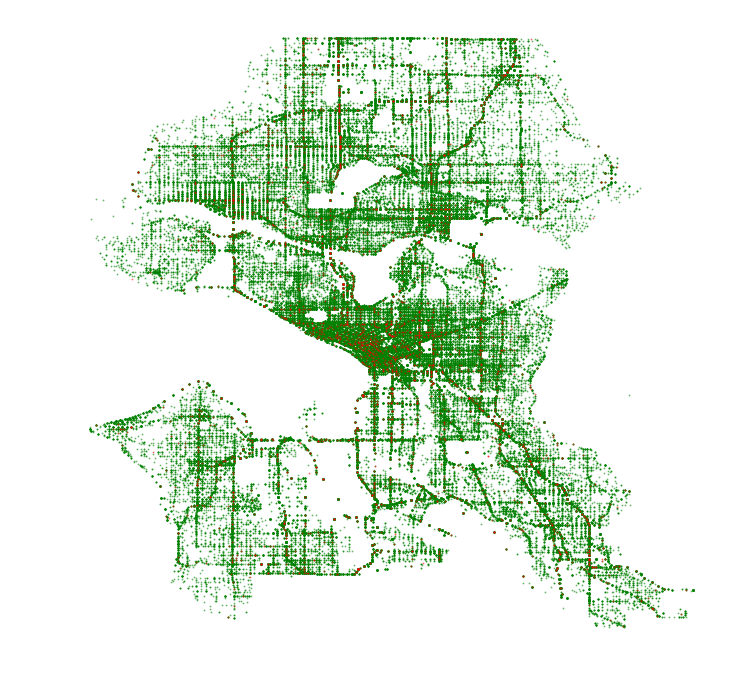

In [5]:
#Creating a visualization of the collisions as a scatter plot using the lat and long coordinates
plt.figure(figsize=(12,12))
plt.scatter(df_binary[df_binary['Severity Description']=='Not Severe']['Longitude'],df_binary[df_binary['Severity Description']=='Not Severe']['Latitude'],color='green',alpha=0.4,s=1,zorder=0)
plt.scatter(df_binary[df_binary['Severity Description']=='Severe']['Longitude'],df_binary[df_binary['Severity Description']=='Severe']['Latitude'],color='red',s=1,alpha=0.4,zorder=1)
plt.style.use('default')
plt.xlabel('Longtidue')
plt.ylabel('Latitude')
plt.axis('off')
plt.show()

Above, we have a visualization of all the collisions as a scatter plot of the coordinates. Since there are enough instances in the dataset, the plot essentially plots out the entire map of Seattle. This can be confirmed by looking at the folium map. 

In the map, the green points denote non-severe collisions while the red points denote severe cases. As expected, the green instances are much more prevalent. Despite the sparse nature of the severe points, they can still be seen across the map. 

Below, the severe and non-severe points are plotted separately in order to better understand each case. 

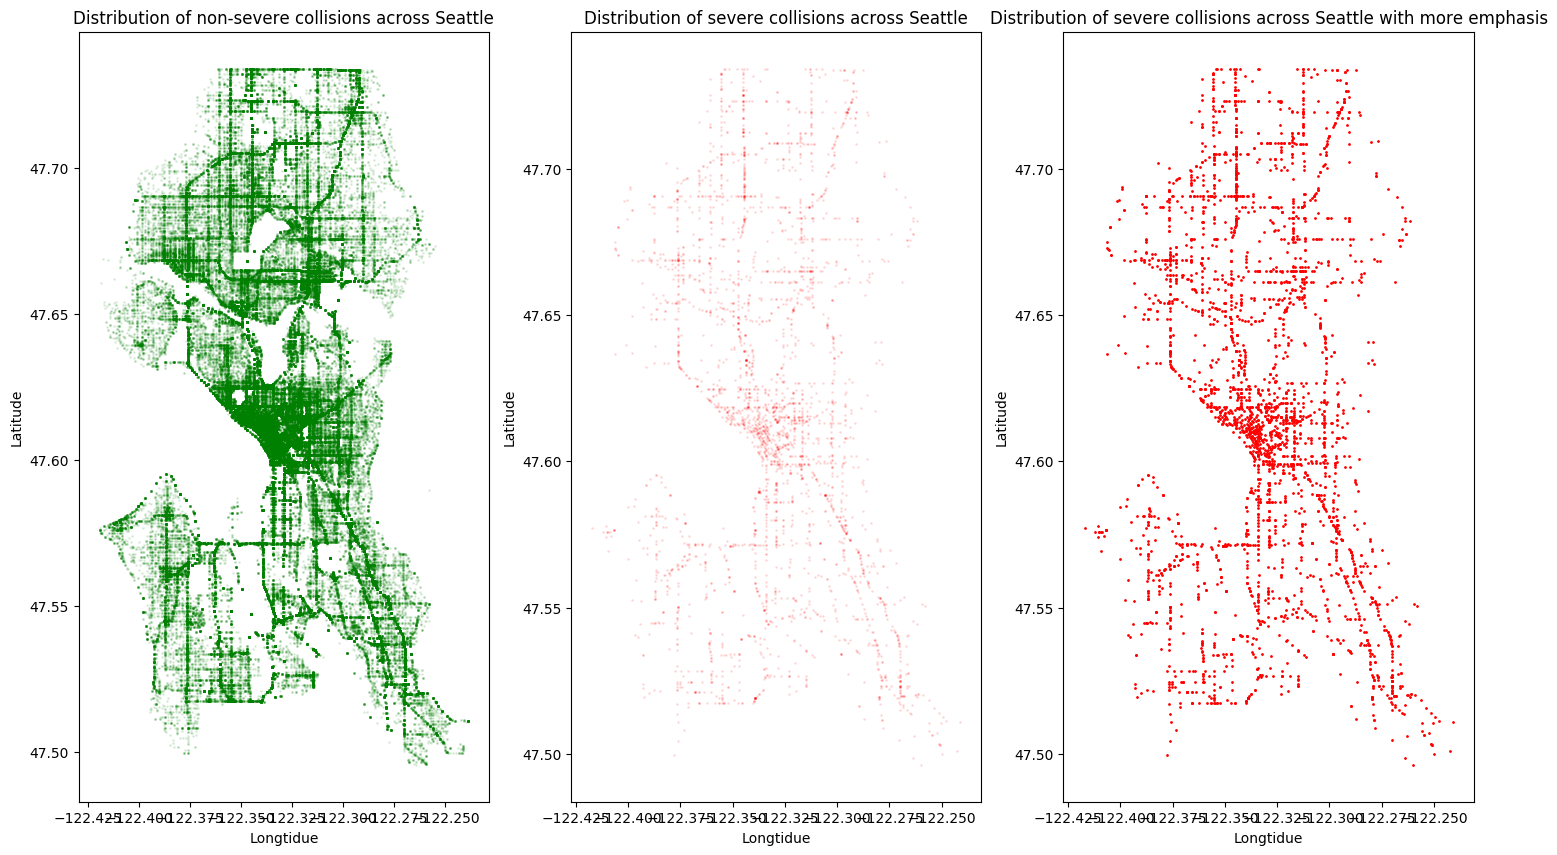

In [6]:
plt.figure(figsize=(18,10))
plt.subplot(1,3,1)
plt.scatter(df_binary[df_binary['Severity Description']=='Not Severe']['Longitude'],df_binary[df_binary['Severity Description']=='Not Severe']['Latitude'],color='green',alpha=0.1,s=1)
plt.title('Distribution of non-severe collisions across Seattle')
plt.xlabel('Longtidue')
plt.ylabel('Latitude')

plt.subplot(1,3,2)
plt.scatter(df_binary[df_binary['Severity Description']=='Severe']['Longitude'],df_binary[df_binary['Severity Description']=='Severe']['Latitude'],color='red',s=1,alpha=0.1)
plt.title('Distribution of severe collisions across Seattle')
plt.xlabel('Longtidue')
plt.ylabel('Latitude')
plt.subplot(1,3,3)

plt.scatter(df_binary[df_binary['Severity Description']=='Severe']['Longitude'],df_binary[df_binary['Severity Description']=='Severe']['Latitude'],color='red',s=1,alpha=1)
plt.title('Distribution of severe collisions across Seattle with more emphasis')
plt.xlabel('Longtidue')
plt.ylabel('Latitude')
plt.show()

Three different plots are shown above. The first plot, shown in green, displays the non-severe cases. The second plot shows the severe cases but they appear sparse due to the low density of such cases. The third plot is the same as the second one but with the transparency increased so that the points can be visualized better. However, for a one-to-one comparison, only the first 2 plots can be used. 

In the first plot, clearly the center of Seattle has the highest density of collisions with several streets towards the north also depicting dense regions. The density is relatively lower on the southern side. 

Areas of dense collisions for severe cases in decreasing order: 
- Center of Seattle
- Aurora Ave North (road going north)
- Rainier Ave South (the road going south-east)
- 15th Ave Northwest (road going north-west)
- Lake City Way Northeast (road going north-east)
- 24th Ave East

Most of these areas are also dense for the non-severe cases but the non-severe plot also has other regions of higher density as opposed to the severe plot which mostly emphasizes just these areas. 

# 5. Bivariate analysis

Next, we explore each variable further with the severity variable now containing just two classes: 
- Non-severe
- Severe

In this section, we will only be looking at the variabes that we are going to include in our baseline model. Here is a list of the those variables: 
- Neighborhood
- Weather
- Road Conditions
- Light Conditions
- Address Type
- Junction Type
- Speed
- Traffic Congestion
- Road Length
- Year
- Month
- Date
- Hour

Variables that will not be considered for the model since they are information collected following a collision incident and cannot be used to predict collision severity: 
- Status
- Number of People Involved
- Number of Vehicles Involved
- Number of Pedestrians Involved
- Number of Bicycles Involved
- Number of Injuries
- Number of Serious Injuries
- Number of Fatal Injuries
- SDOT Collision Description
- Latitude
- Longitude
- State Collision Description
- Num People Square
- DUI
- Incident Date and Time

Note that the date-related variables will be covered under the *Timeseries Analysis* section separately.

## a. *Categorical variables*

Here, we try to answer the following questions: 
- Which neighborhoods exhibit a higher number of collisions? Are there neighborhoods that are more prone to severe collisions? 
- Can the variability in severity be explained using weather related variables such as weather, road conditions and light conditions? 
- Are there certain types of areas in the city more prone to severe collisions? 

In [7]:
df_severe = df_binary[df_binary['Severity Description']=='Severe']

### Neighborhood vs Severity 

In [8]:
df_neighborhood = df_binary[['Neighborhood','Severity Description','Latitude']].groupby(['Neighborhood','Severity Description']).count().unstack()
df_neighborhood

Latitude        
Severity Description Not Severe  Severe
Neighborhood                           
Boulevard Park           1734.0    28.0
Bryn Mawr-Skyway         5108.0   100.0
Inglewood-Finn Hill      1618.0    28.0
Kirkland                    1.0     NaN
Lake Forest Park         6061.0   100.0
Medina                    460.0     5.0
Mercer Island            3561.0    47.0
Riverton                 4625.0    76.0
Seattle                128124.0  1924.0
Shoreline               27266.0   492.0
Tukwila                    54.0     NaN
White Center            22787.0   423.0
Yarrow Point              760.0    12.0

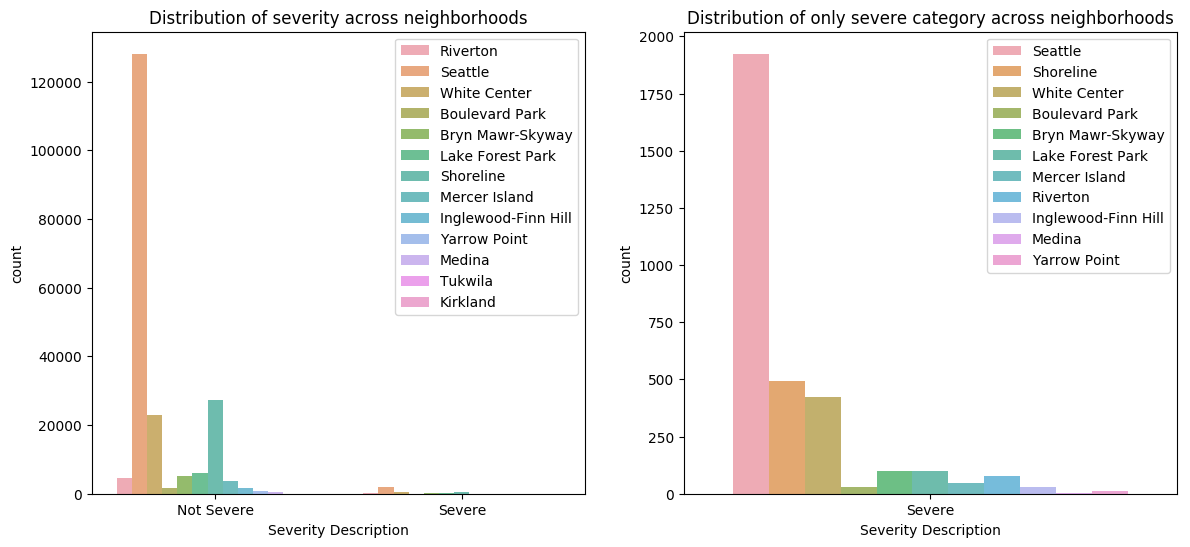

In [9]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.countplot(x='Severity Description',hue='Neighborhood',data=df_binary,alpha=0.8)
plt.title('Distribution of severity across neighborhoods')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
sns.countplot(x='Severity Description',hue='Neighborhood',data=df_severe,alpha=0.8)
plt.title('Distribution of only severe category across neighborhoods')
plt.legend(loc='upper right')

plt.show()

Looking at the neighborhood variable, we quickly observe from the first plot that the distribution of the severe category can barely be noticed. We therefore visualize this category separately in the second plot. For both severity cases, *Seattle* is by far the most prevalent neighborhood. This makes sense as most of the other neighborhoods are at the edges of the city as we observed from the folium map as well as the scatter plot maps earlier. 

The next two most frequent neighborhoods are Shoreline and White Center for both severity categories. After that, neighborhoods such as *Lake Forest Park, Bryn Mawr-Skyway and Riverton* follow. The exact numbers are shown in the table above. 

However, the important point to note here is that the distribution of neighborhoods for both severity cases are pretty much the same. Hence, there is not much to differentiate non-severe instances from the severe. 

### Weather vs Severity

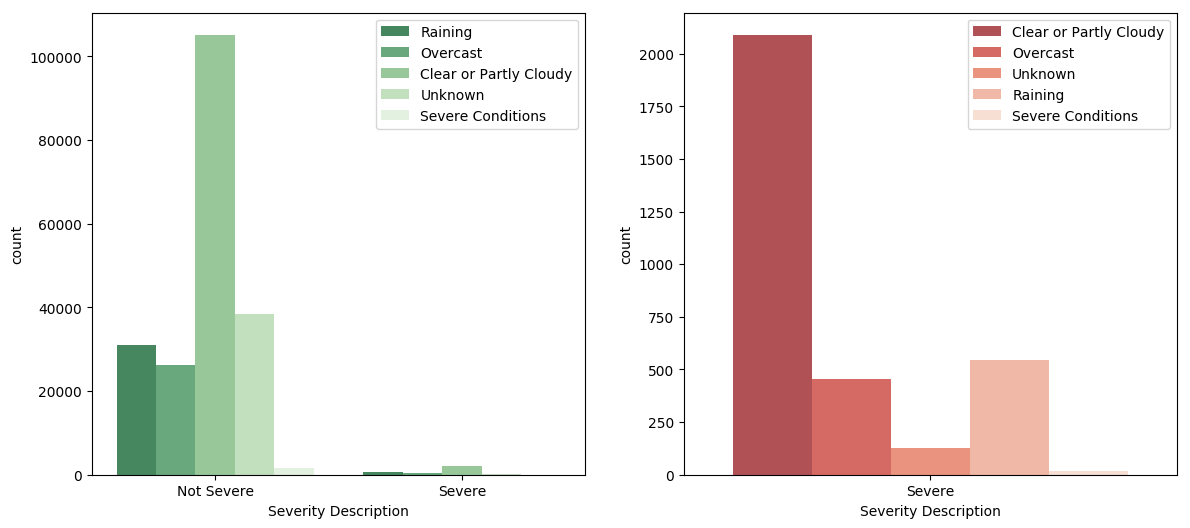

                         Latitude       
Severity Description   Not Severe Severe
Weather                                 
Clear or Partly Cloudy     105155   2090
Overcast                    26156    456
Raining                     30929    545
Severe Conditions            1594     18
Unknown                     38325    126


In [10]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.countplot(x='Severity Description',hue='Weather',data=df_binary,alpha=0.8,palette='Greens_r')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
sns.countplot(x='Severity Description',hue='Weather',data=df_severe,alpha=0.8,palette='Reds_r')
plt.legend(loc='upper right')

plt.show()

print (df_binary[['Severity Description','Weather','Latitude']].groupby(['Weather','Severity Description']).count().unstack())

Once again we look at the weather variables, this time with clearer categories and binary severity classes. For both cases, clear and partly cloudy conditions are the most prevalent probably because there is more traffic on the roads under those conditions which in turn causes more collisions. In order to normalize this issue, we would need to determine the rate of traffic flow under each condition and then divide the amount for each category by the corresponding traffic rate. However, we don't have such data at the moment. 

When it comes to the other weather categories, the distribution is once again similar for both severity cases. Hence, this variable also does not provide too much useful information. 

### Light Condition vs Severity

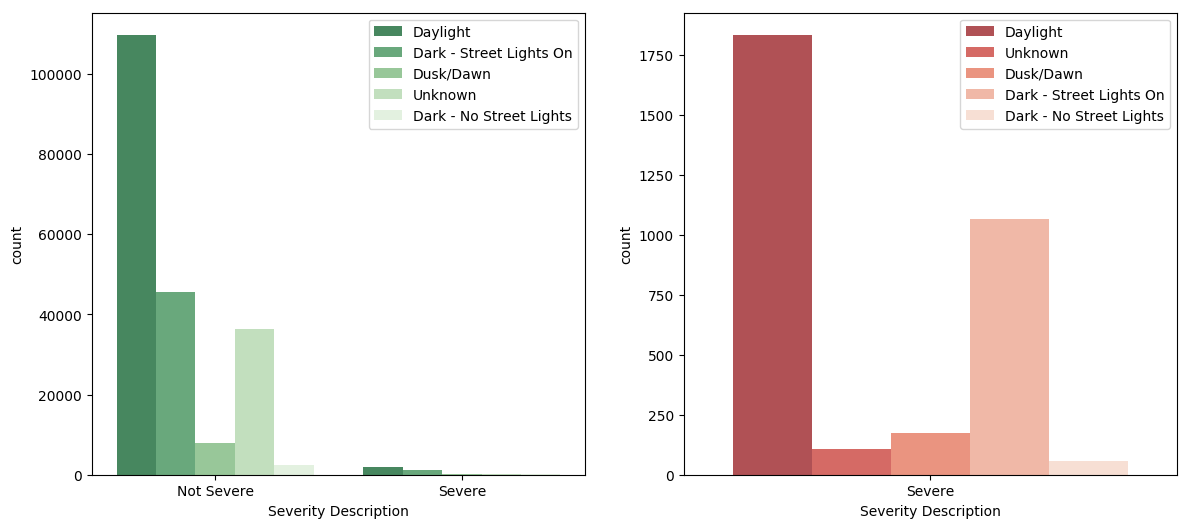

                          Latitude       
Severity Description    Not Severe Severe
Light Condition                          
Dark - No Street Lights       2509     57
Dark - Street Lights On      45638   1066
Daylight                    109719   1833
Dusk/Dawn                     7921    173
Unknown                      36372    106


In [11]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.countplot(x='Severity Description',hue='Light Condition',data=df_binary,alpha=0.8,palette='Greens_r')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
sns.countplot(x='Severity Description',hue='Light Condition',data=df_severe,alpha=0.8,palette='Reds_r')
plt.legend(loc='upper right')

plt.show()

print (df_binary[['Severity Description','Light Condition','Latitude']].groupby(['Light Condition','Severity Description']).count().unstack())

The situation is the same for light conditions as most of the collisions are during the daytime and there is nothing to indicate a difference between severe and non-severe cases. The spread of light conditions across severity categories are similar. 

### Road Condition vs Severity

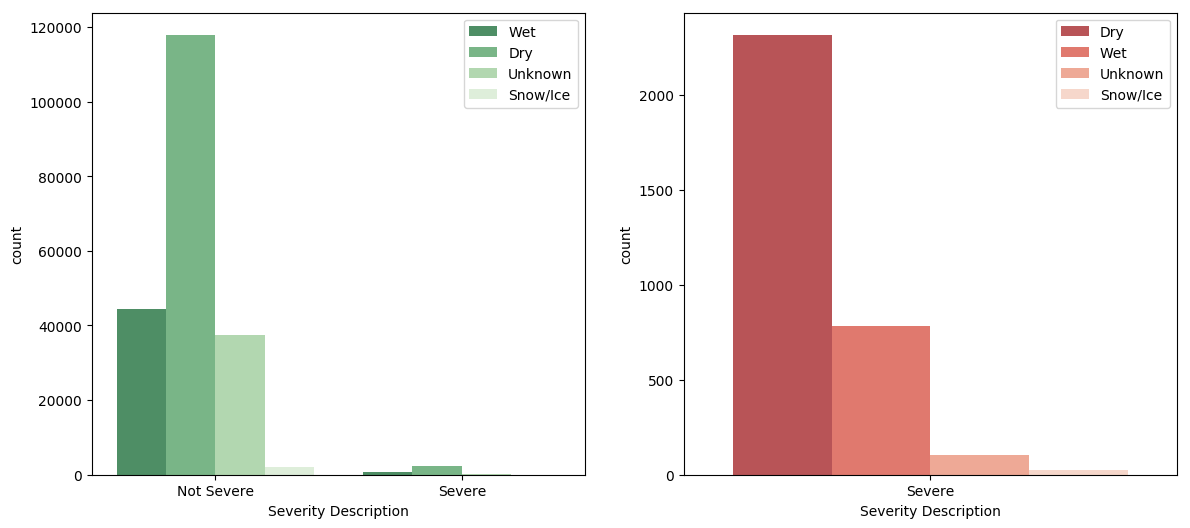

                       Latitude       
Severity Description Not Severe Severe
Road Condition                        
Dry                      117941   2318
Snow/Ice                   2140     26
Unknown                   37540    106
Wet                       44538    785


In [12]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.countplot(x='Severity Description',hue='Road Condition',data=df_binary,alpha=0.8,palette='Greens_r')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
sns.countplot(x='Severity Description',hue='Road Condition',data=df_severe,alpha=0.8,palette='Reds_r')
plt.legend(loc='upper right')

plt.show()

print (df_binary[['Severity Description','Road Condition','Latitude']].groupby(['Road Condition','Severity Description']).count().unstack())

Road conditions follow the same trend as weather and light conditions. Overall, these variables don't seem to possess useful information for our model without knowing the traffic rate for each category. 

### Address Type vs Severity

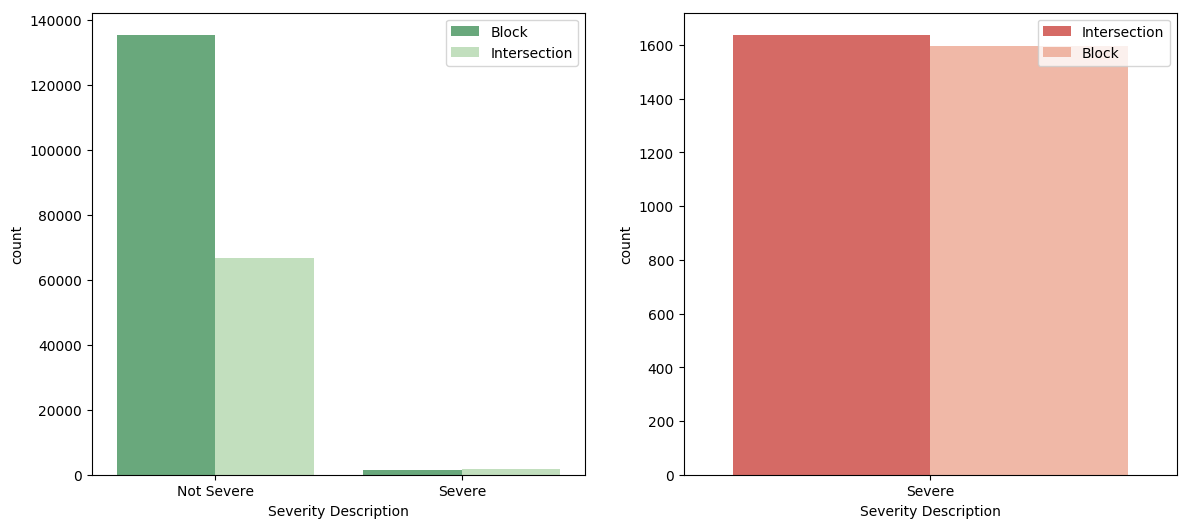

                       Latitude       
Severity Description Not Severe Severe
Address Type                          
Block                    135374   1597
Intersection              66785   1638


In [13]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.countplot(x='Severity Description',hue='Address Type',data=df_binary,alpha=0.8,palette='Greens_r')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
sns.countplot(x='Severity Description',hue='Address Type',data=df_severe,alpha=0.8,palette='Reds_r')
plt.legend(loc='upper right')

plt.show()

print (df_binary[['Severity Description','Address Type','Latitude']].groupby(['Address Type','Severity Description']).count().unstack())

The address type variable is slightly more promising as there is some indication that severe cases have slightly more *intersection* instances than *block*. For non-severe cases, the number of collisions at a block is around twice that of intersections. Hence this could be a promising variable for our model. 

### Junction Type vs Severity

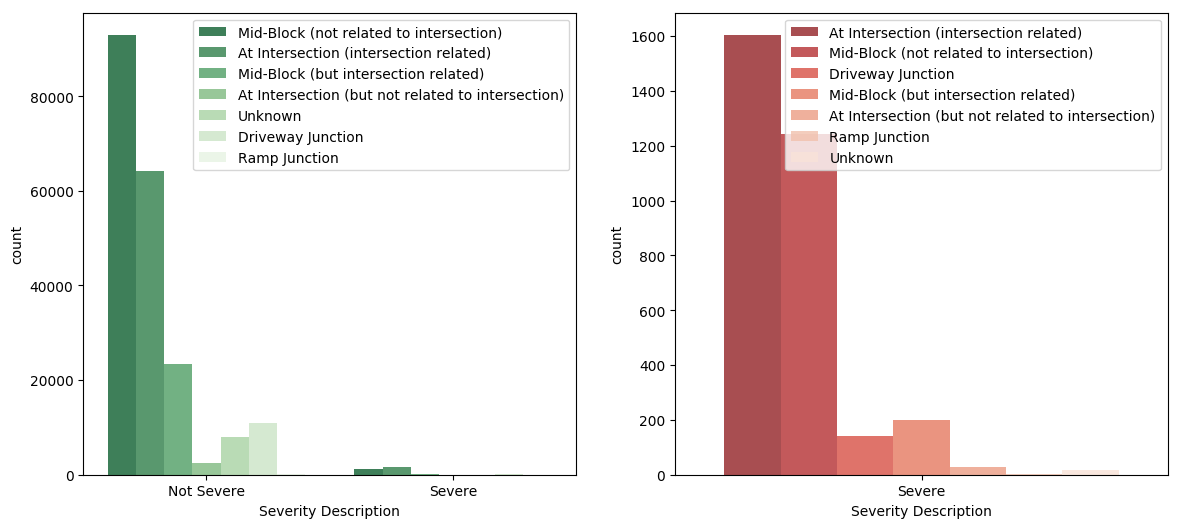

                                                    Latitude       
Severity Description                              Not Severe Severe
Junction Type                                                      
At Intersection (but not related to intersection)       2409     27
At Intersection (intersection related)                 64136   1605
Driveway Junction                                      10931    142
Mid-Block (but intersection related)                   23481    198
Mid-Block (not related to intersection)                93011   1243
Ramp Junction                                            161      3
Unknown                                                 8030     17


In [14]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.countplot(x='Severity Description',hue='Junction Type',data=df_binary,alpha=0.8,palette='Greens_r')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
sns.countplot(x='Severity Description',hue='Junction Type',data=df_severe,alpha=0.8,palette='Reds_r')
plt.legend(loc='upper right')

plt.show()

print (df_binary[['Severity Description','Junction Type','Latitude']].groupby(['Junction Type','Severity Description']).count().unstack())

Once again, for the junction type variable, intersection collisions are higher for the severe class whereas mid-block is more prevalent for non-severe cases. Despite the low proportion of severe cases, this difference in junction type should be reflected in the model when the minority class is oversampled. 

### State Collision Description vs Severity

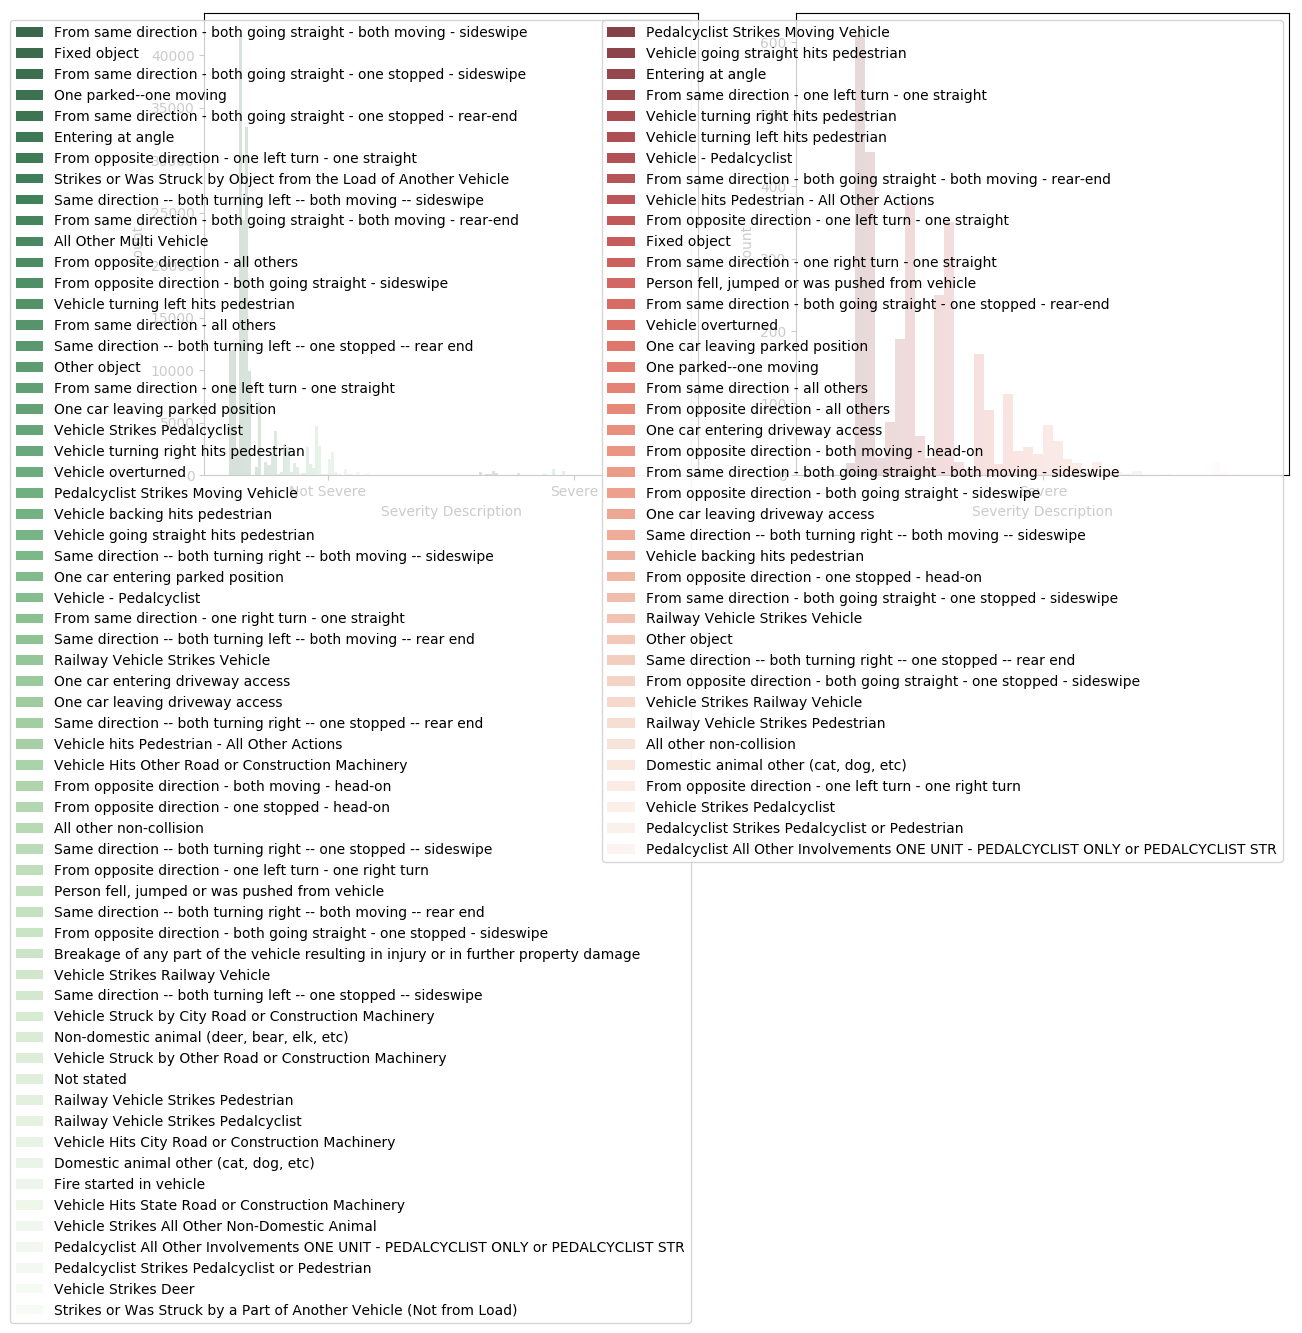

In [15]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.countplot(x='Severity Description',hue='STATE Collision Description',data=df_binary,alpha=0.8,palette='Greens_r')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
sns.countplot(x='Severity Description',hue='STATE Collision Description',data=df_severe,alpha=0.8,palette='Reds_r')
plt.legend(loc='upper right')

plt.show()

In [16]:
print (df_binary[['Severity Description','STATE Collision Description','Latitude']].groupby(['STATE Collision Description','Severity Description']).count().unstack().sort_values(('Latitude','Not Severe'),ascending=False))

                                                     Latitude       
Severity Description                               Not Severe Severe
STATE Collision Description                                         
One parked--one moving                                41875.0  113.0
Entering at angle                                     33147.0  448.0
From same direction - both going straight - one...    24324.0  168.0
Fixed object                                          11967.0  351.0
From same direction - both going straight - bot...    11810.0   47.0
From opposite direction - one left turn - one s...     9901.0  250.0
From same direction - both going straight - bot...     6956.0   55.0
Vehicle - Pedalcyclist                                 4668.0  379.0
From same direction - all others                       4203.0   34.0
From same direction - one left turn - one straight     2974.0   24.0
From same direction - one right turn - one stra...     2834.0   19.0
Vehicle going straight hits pedest

In [17]:
print (df_binary[['Severity Description','STATE Collision Description','Latitude']].groupby(['STATE Collision Description','Severity Description']).count().unstack().sort_values(('Latitude','Severe'),ascending=False))

                                                     Latitude       
Severity Description                               Not Severe Severe
STATE Collision Description                                         
Vehicle going straight hits pedestrian                 2699.0  609.0
Entering at angle                                     33147.0  448.0
Vehicle - Pedalcyclist                                 4668.0  379.0
Fixed object                                          11967.0  351.0
From opposite direction - one left turn - one s...     9901.0  250.0
Vehicle turning left hits pedestrian                   2072.0  189.0
From same direction - both going straight - one...    24324.0  168.0
One parked--one moving                                41875.0  113.0
Vehicle overturned                                      769.0   90.0
Vehicle turning right hits pedestrian                  1143.0   74.0
From opposite direction - both moving - head-on         562.0   70.0
From same direction - both going s

Even though we can't use the collision description variable for our modeling, it's interesting to observe the top descriptions.

For non-severe collisions, 41,875 of the instances were caused by one moving car and one parked car. 33,147 collisions occurred when a car was entering at an angle. 24,324 occurred when both cars were heading in the same direction while 11,967 instances were due to a fixed object. 

The top descriptions for severe collisions were slightly different. The highest one was a vehicles hitting a pedestrian (609). The second highest was entering at an angle (448) while 379 instances were caused by a vehicle colliding with a cyclist. 351 collisions were due to a fixed object and 250 were caused by vehicles moving in the opposite direction. 

It is interesting to notice that for non-severe collisions, none of the top 5 causes included pedestrians or cyclists while the severe cases did. This makes sense as the severity of a collision is inherently determined by the extent of injury caused to humans. 

### SDOT Collision Description vs Severity

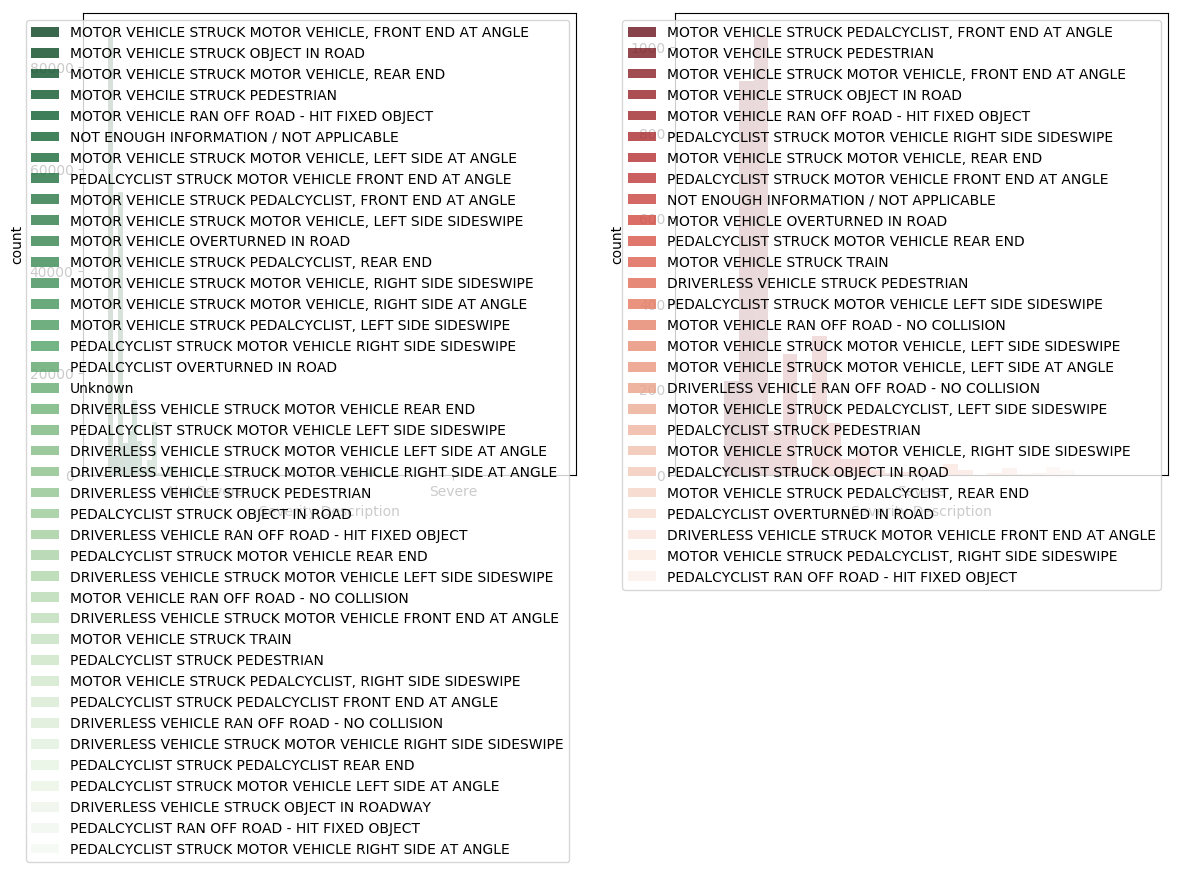

In [18]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.countplot(x='Severity Description',hue='SDOT Collision Description',data=df_binary,alpha=0.8,palette='Greens_r')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
sns.countplot(x='Severity Description',hue='SDOT Collision Description',data=df_severe,alpha=0.8,palette='Reds_r')
plt.legend(loc='upper right')

plt.show()

In [19]:
print (df_binary[['Severity Description','SDOT Collision Description','Latitude']].groupby(['SDOT Collision Description','Severity Description']).count().unstack().sort_values(('Latitude','Not Severe'),ascending=False))
print (df_binary[['Severity Description','SDOT Collision Description','Latitude']].groupby(['SDOT Collision Description','Severity Description']).count().unstack().sort_values(('Latitude','Severe'),ascending=False))

                                                     Latitude        
Severity Description                               Not Severe  Severe
SDOT Collision Description                                           
MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END A...    86201.0  1028.0
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END          55444.0   325.0
NOT ENOUGH INFORMATION / NOT APPLICABLE               14729.0    37.0
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE S...    10404.0    26.0
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT          8703.0   283.0
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE A...     6589.0    12.0
MOTOR VEHCILE STRUCK PEDESTRIAN                        6321.0   920.0
MOTOR VEHICLE STRUCK OBJECT IN ROAD                    3981.0   103.0
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT...     3035.0   219.0
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE ...     1734.0     2.0
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE ...     1697.0     NaN
PEDALCYCLIST STRUCK 

The SDOT collision descriptions are similar to the state descriptions. Once again, the top categories for severe cases contain pedestrians and cyclists while the non-severe cases contain other vehicles and fixed objects. 

Once again, we won't be including this variable in our model. 

## b. *Numerical variables*

Some questions to consider in this section: 
- Do we expect a higher rate of severe collisions on roads with a greater speed of traffic? 
- Is severity level affected by road length or congestion? 

In [20]:
#Printing a correlation matrix for the numerical variables
corr = df_binary.corr()
corr.style.background_gradient(cmap='coolwarm')

The correlation matrix above shows the correlation across every continuous variable in the dataset. Variables such as number of vehicles and number of people have a decent correlation but these variables are not going to be included in the modeling process since they are only known once the collision has occurred. 

From the important variables, road length and road congestion have a really high correlation, 0.997324. This would indicate collinearity. Once we determine the relationship of these variables with severity, we can make a decision as to which variable to possibly remove from the dataset. 

### Speed vs Severity

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


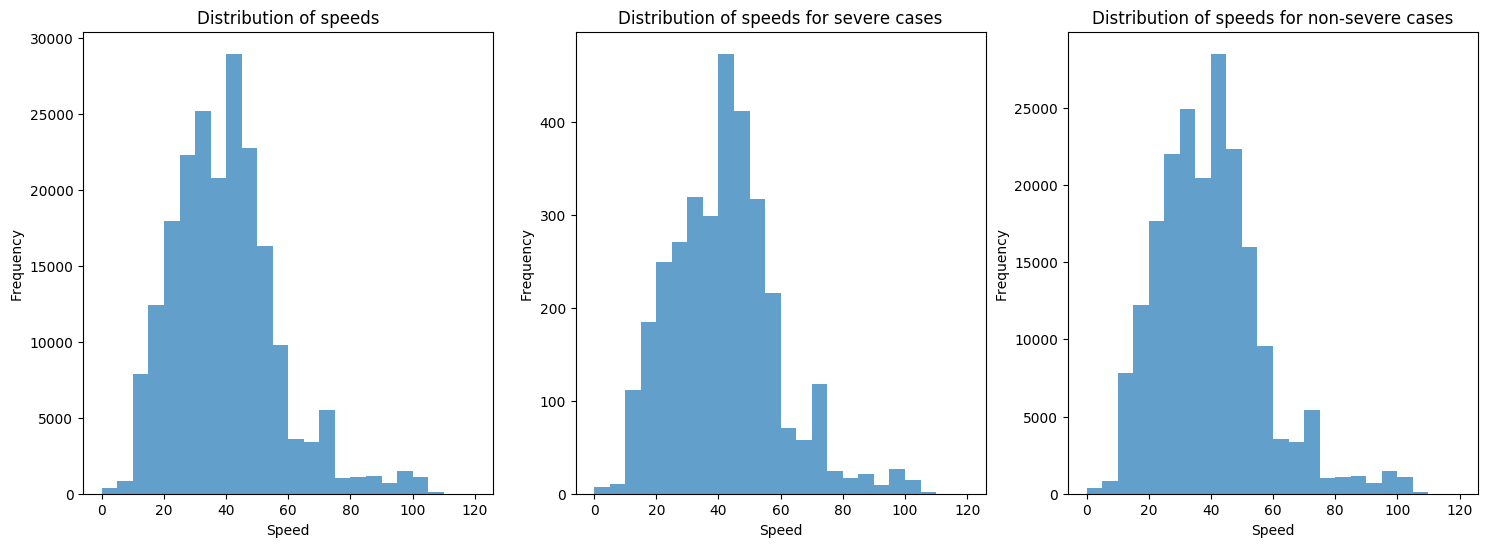

In [21]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.hist(df_binary['Speed'],range=(0,120),bins=24,alpha=0.7)
plt.title("Distribution of speeds")
plt.xlabel("Speed")
plt.ylabel("Frequency")

plt.subplot(1,3,2)
plt.hist(df_binary[df_binary['Severity Description']=='Severe']['Speed'],range=(0,120),bins=24,alpha=0.7)
plt.title("Distribution of speeds for severe cases")
plt.xlabel("Speed")
plt.ylabel("Frequency")

plt.subplot(1,3,3)
plt.hist(df_binary[df_binary['Severity Description']=='Not Severe']['Speed'],range=(0,120),bins=24,alpha=0.7)
plt.title("Distribution of speeds for non-severe cases")
plt.xlabel("Speed")
plt.ylabel("Frequency")

plt.show()

For the speed variable, the histogrames for the two severity cases as well as the overall speed distribution are almost identical. Hence, not much information can be gathered from this data. 

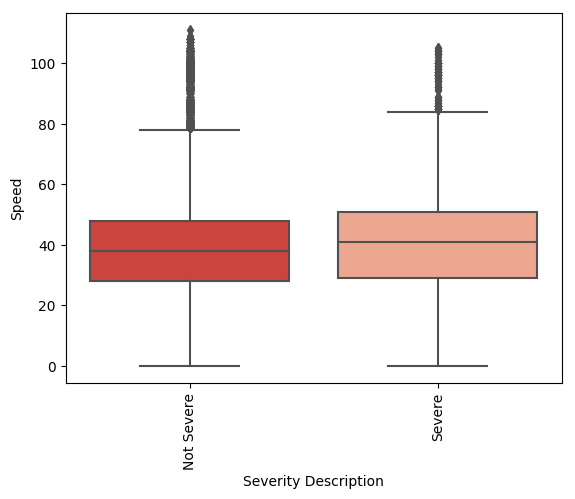

In [22]:
sns.boxplot(x='Severity Description',y='Speed',data=df_binary,palette='Reds_r')
plt.xticks(rotation=90)
plt.show()

The boxplot reveals that the severe cases have a slightly higher median. Severe has a median of 41 while non-severe has a median of 38 as confirmed by the table below. 

In [23]:
df_binary[['Severity Description','Speed']].groupby('Severity Description').agg(['count','mean','median']).sort_values(('Speed','mean'),ascending=False)

Speed                  
                       count       mean median
Severity Description                          
Severe                  3230  41.413932   41.0
Not Severe            201678  39.218933   38.0

### Traffic Congestion vs Severity

In [24]:
df_filtered = df_binary[(df_binary['Road Congestion']<900)]

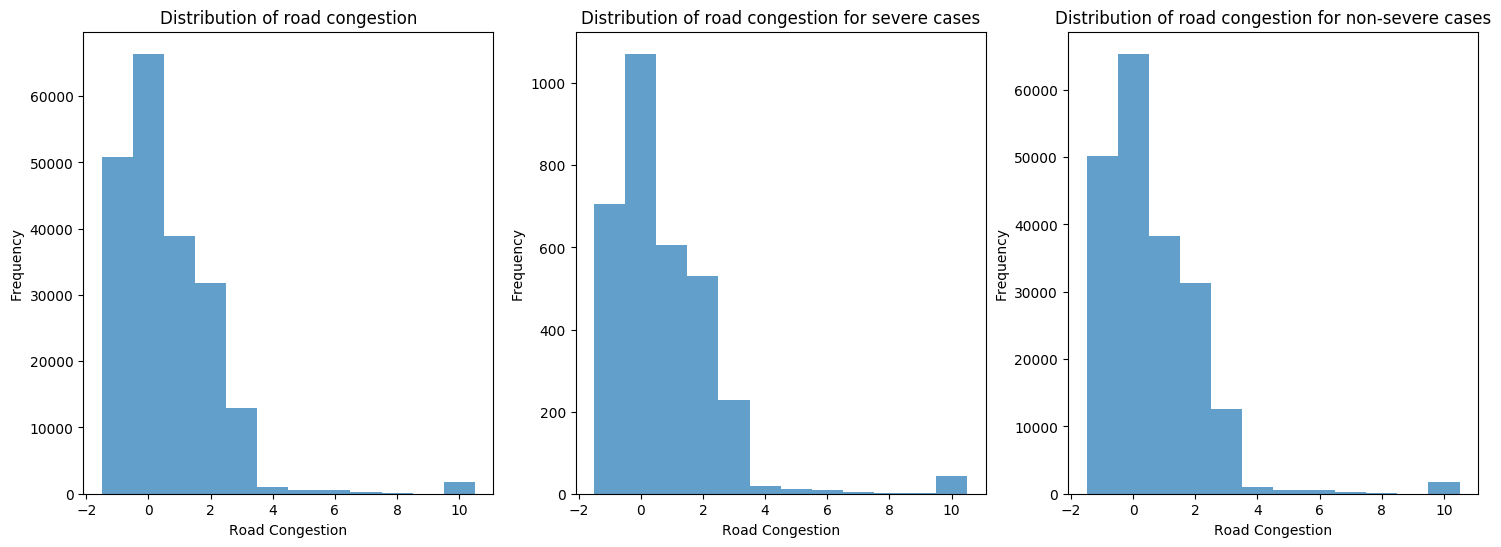

In [25]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.hist(df_filtered['Road Congestion'],range=(-1,11),bins=12,alpha=0.7,align='left')
plt.title("Distribution of road congestion")
plt.xlabel("Road Congestion")
plt.ylabel("Frequency")

plt.subplot(1,3,2)
plt.hist(df_filtered[df_filtered['Severity Description']=='Severe']['Road Congestion'],range=(-1,11),bins=12,alpha=0.7,align='left')
plt.title("Distribution of road congestion for severe cases")
plt.xlabel("Road Congestion")
plt.ylabel("Frequency")

plt.subplot(1,3,3)
plt.hist(df_filtered[df_filtered['Severity Description']=='Not Severe']['Road Congestion'],range=(-1,11),bins=12,alpha=0.7,align='left')
plt.title("Distribution of road congestion for non-severe cases")
plt.xlabel("Road Congestion")
plt.ylabel("Frequency")

plt.show()

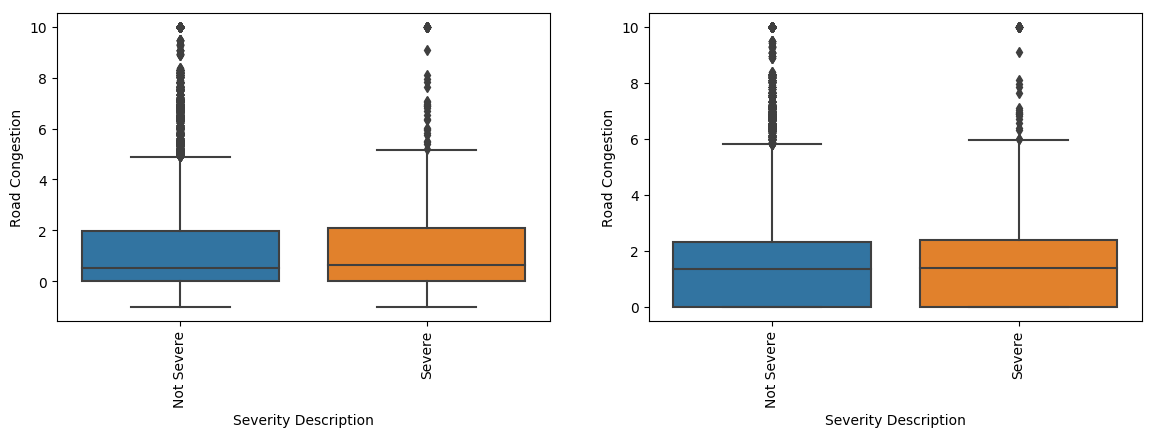

In [26]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(x='Severity Description',y='Road Congestion',data=df_filtered)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(x='Severity Description',y='Road Congestion',data=df_filtered[df_filtered['Road Congestion']>-1])
plt.xticks(rotation=90)
plt.show()

In [27]:
df_filtered[['Severity Description','Road Congestion']].groupby(['Severity Description']).agg(['count','mean','median','min','max'])

Road Congestion                              
                               count      mean   median  min   max
Severity Description                                              
Not Severe                    202035  0.872153  0.50823 -1.0  10.0
Severe                          3234  1.009026  0.63665 -1.0  10.0

The distributions of road congestion across severity are almost identical. The median for not severe is slightly lower (0.50823) than the severe (0.63665). 

### Road Length vs Severity

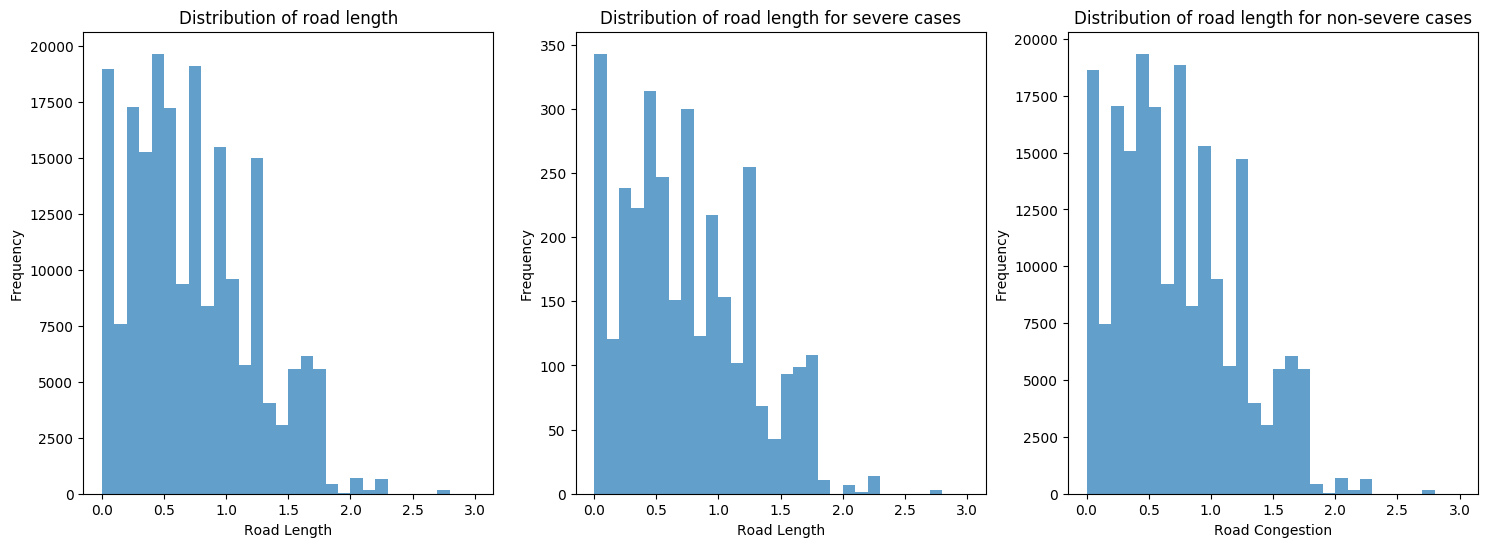

In [28]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.hist(df_filtered['Road Length'],range=(0,3),bins=30,alpha=0.7)
plt.title("Distribution of road length")
plt.xlabel("Road Length")
plt.ylabel("Frequency")

plt.subplot(1,3,2)
plt.hist(df_filtered[df_filtered['Severity Description']=='Severe']['Road Length'],range=(0,3),bins=30,alpha=0.7)
plt.title("Distribution of road length for severe cases")
plt.xlabel("Road Length")
plt.ylabel("Frequency")

plt.subplot(1,3,3)
plt.hist(df_filtered[df_filtered['Severity Description']=='Not Severe']['Road Length'],range=(0,3),bins=30,alpha=0.7)
plt.title("Distribution of road length for non-severe cases")
plt.xlabel("Road Congestion")
plt.ylabel("Frequency")

plt.show()

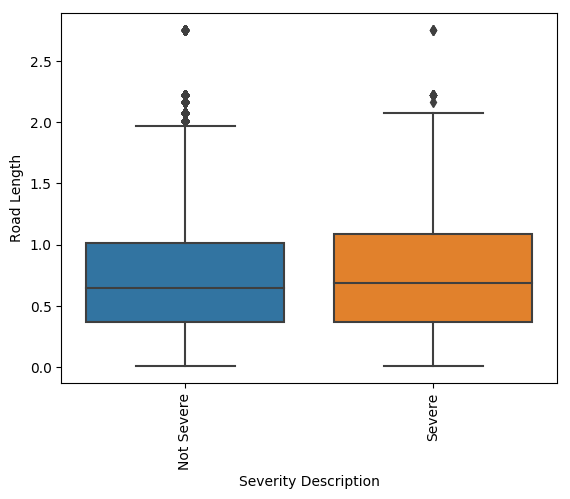

In [29]:
sns.boxplot(x='Severity Description',y='Road Length',data=df_filtered)
plt.xticks(rotation=90)
plt.show()

In [30]:
df_filtered[['Severity Description','Road Length']].groupby(['Severity Description']).agg(['count','mean','median','min','max'])

Road Length                                     
                           count      mean   median      min      max
Severity Description                                                 
Not Severe                202035  0.725182  0.64112  0.00772  2.75415
Severe                      3234  0.734555  0.68298  0.01036  2.75415

Similar to road congestion, the distributions for road length is also extemely tight across severity where the median only differs by around 0.04. 

Overall, despite the fact that the speed, road congestion and road length variables don't provide a clear disinction between the severity levels, they could still prove to be useful for our model. Following the creation of the base model, we can try to see whether removing these variables improves the model or not. 

## b. *Timeseries analysis*

Questions relating to date and time variables: 
- What is the trend of collisions over the years? Can we split the data by year for training and testing? 
- Are there certain months where the severity of collisions is greater? 
- Does the severity level vary across days in a month? 
- Does severity vary across days of the week? 
- Which hours of the day see the highest rates of collision? Does the severity level vary across hours of the day? 

### Year vs Severity

In [31]:
df_binary['Year'].value_counts().sort_index(ascending=False)

2019     6995
2018    11896
2017    12052
2016    13228
2015    13549
2014    12661
2013    12289
2012    12303
2011    12011
2010    11615
2009    12729
2008    13568
2007    14572
2006    15355
2005    15564
2004    15006
2003        1
Name: Year, dtype: int64

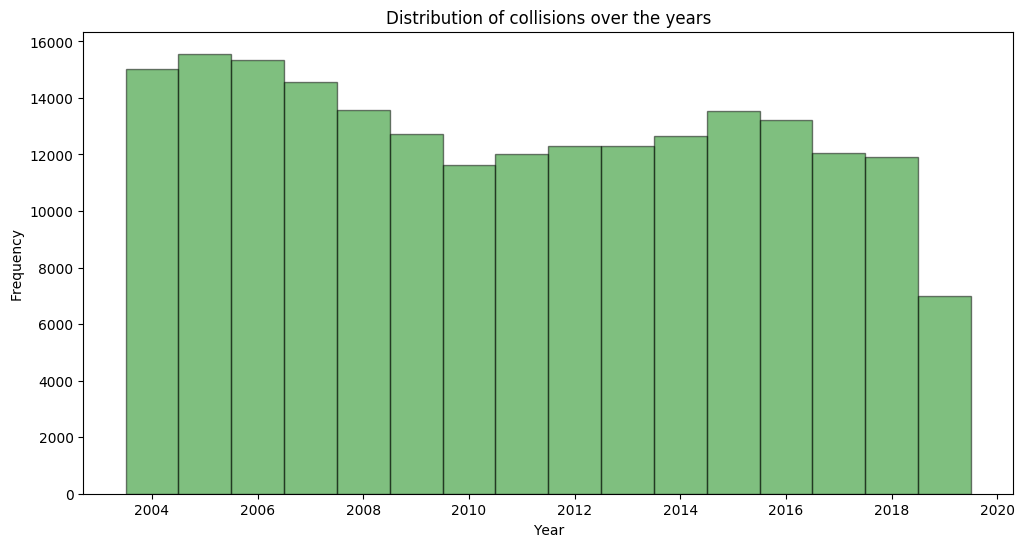

In [32]:
plt.figure(figsize=(12,6))
plt.hist(df_binary['Year'],range=(2004,2020),bins=16,alpha=0.5,color='green',edgecolor='black',align='left')
plt.title('Distribution of collisions over the years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

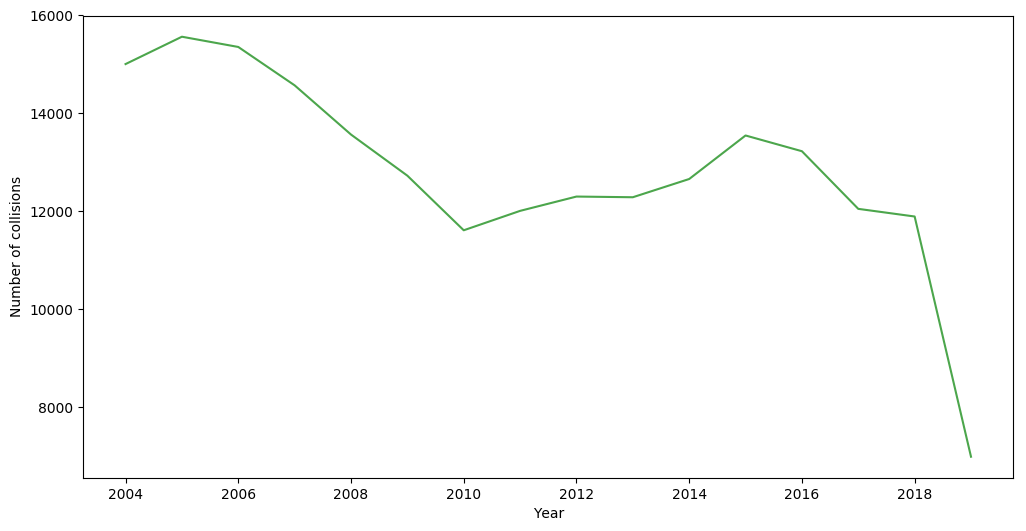

In [33]:
plt.figure(figsize=(12,6))
plt.plot(df_binary[df_binary['Year']>2003]['Year'].value_counts().sort_index(),alpha=0.7,color='green')
plt.xlabel("Year")
plt.ylabel("Number of collisions")
plt.show()

From the above distribution, it can be clearly seen that the total number of reported collisions in Seattle have a downward trend over the years. A closer look reveals that there is a continuous downward trend between 2005 and 2010. However, there is an upward increase in collisions from 2011 to 2015 followed by another downward trend till 2018. 

It is to be noted that 2019 has a much lower collision count because data for that year was not completely collected at the time of the data acquisition. 

Note that at this point, the distinction between different levels of severity has not been made yet. 

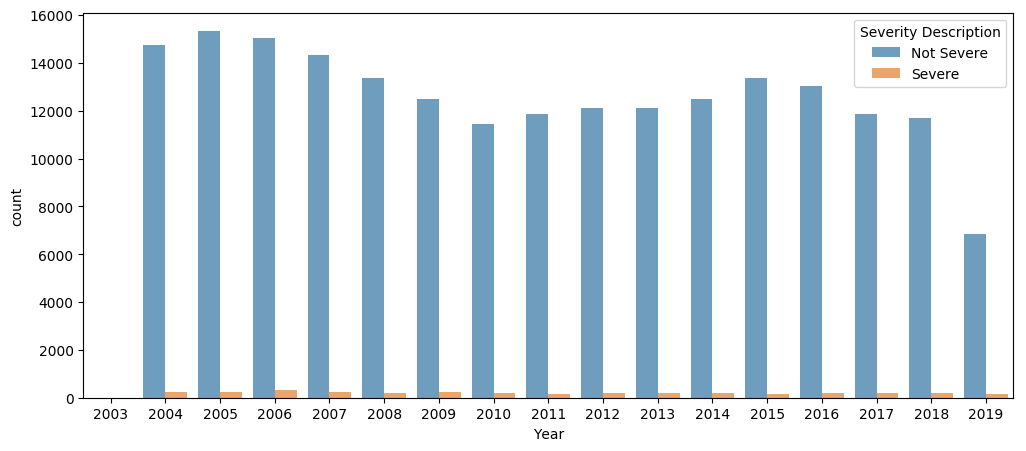

In [34]:
plt.figure(figsize=(12,5))
sns.countplot(hue='Severity Description',x='Year',data=df_binary,alpha=0.7)
plt.show()

When we split the year data into the two severity categories, the first thing we notice is that the non severe collisions essentially follow the same trend as the total number of collisions while the severe cases fluctuate a little. 

In fact, the severe instances have a spike in 2006, followed by a downward trend till 2011. Between 2012 and 2019, the number of severe collisions appears to stay mostly steady with no obvious upward or downward trend. However, if we look at the overall trend, there is certainly a downward pattern  

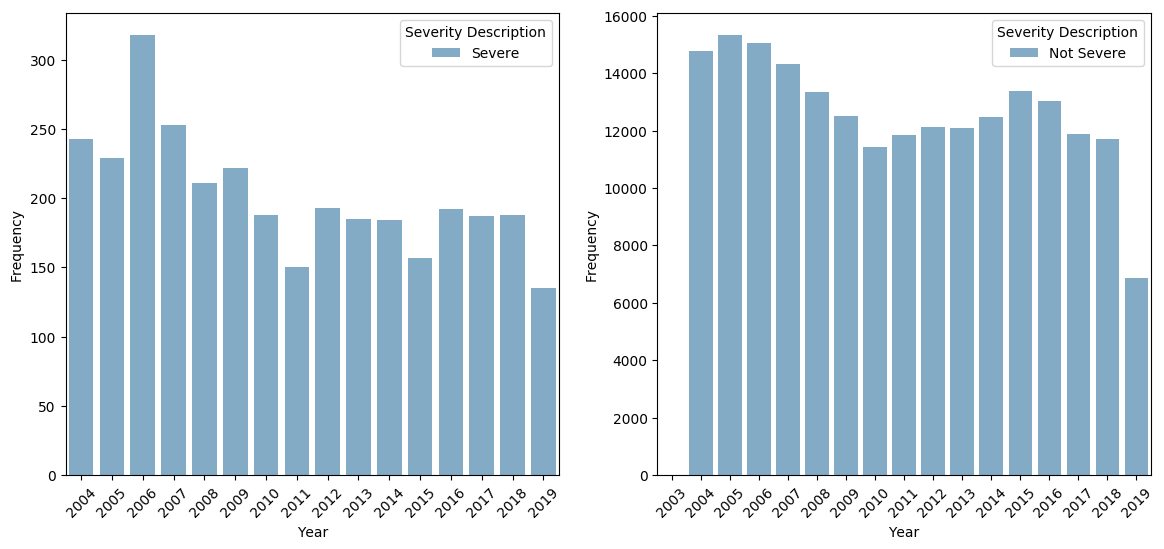

In [35]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(hue='Severity Description',x='Year',data=df_binary[df_binary['Severity Description']=='Severe'],alpha=0.6)
plt.xticks(rotation=45)
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.countplot(hue='Severity Description',x='Year',data=df_binary[df_binary['Severity Description']=='Not Severe'],alpha=0.6)
plt.xticks(rotation=45)
plt.ylabel('Frequency')

plt.show()

                       Latitude        Severe rate Not severe rate
Severity Description Not Severe Severe                            
Year                                                              
2003                        1.0    NaN         NaN             NaN
2004                    14763.0  243.0    1.619352       98.380648
2005                    15335.0  229.0    1.471344       98.528656
2006                    15037.0  318.0    2.070987       97.929013
2007                    14319.0  253.0    1.736206       98.263794
2008                    13357.0  211.0    1.555130       98.444870
2009                    12507.0  222.0    1.744049       98.255951
2010                    11427.0  188.0    1.618597       98.381403
2011                    11861.0  150.0    1.248855       98.751145
2012                    12110.0  193.0    1.568723       98.431277
2013                    12104.0  185.0    1.505411       98.494589
2014                    12477.0  184.0    1.453282       98.54

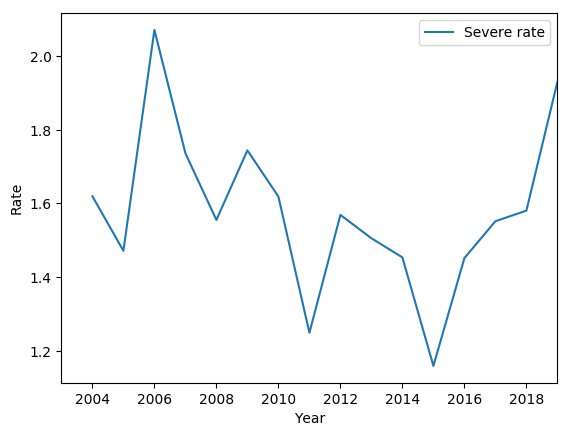

In [36]:
#Determining the severity rates
df_year = df_binary[['Year','Severity Description','Latitude']].groupby(['Year','Severity Description']).count().unstack()
df_year['Severe rate'] = df_year.apply(lambda x: (x[1]/(x[0]+x[1]))*100,axis=1)
df_year['Not severe rate'] = df_year.apply(lambda x: (x[0]/(x[0]+x[1]))*100,axis=1)
print (df_year)

df_year.plot(y='Severe rate')
plt.ylabel('Rate')
plt.show()

Looking at the severe collisions rate over the years, there is certainly a downward trend from 2006 to 2005 followed by a sharp upward pattern for the next four years. This makes sense as we have observed from the previous plots, the severe trend stays somewhat steady between 2011 and 2019 whereas the non-severe trend sees a spike in 2015 followed by a sharp dip in the next few years. 

Even though we can't directly use the year variable for our model, we can train the model on the first 10-12 years and use the subsequent years as the test data. This could cause

### Month vs Severity

In [37]:
df_binary['Month'].value_counts().sort_index()

1     17035
2     14989
3     16977
4     16907
5     17996
6     17724
7     17808
8     17647
9     16461
10    18280
11    17073
12    16497
Name: Month, dtype: int64

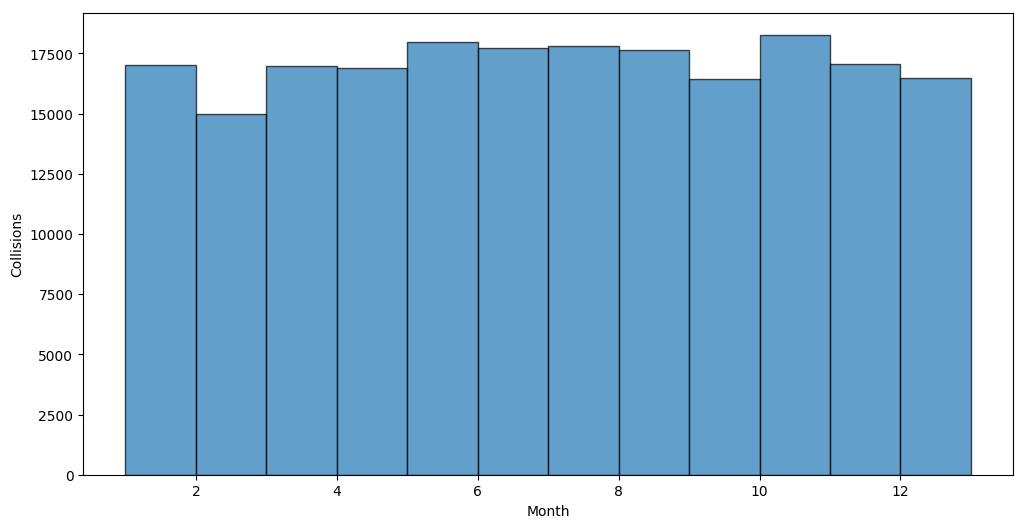

In [38]:
plt.figure(figsize=(12,6))
plt.hist(df_binary['Month'],range=(1,13),bins=12,alpha=0.7,edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Collisions')
plt.show()

<Figure size 1200x600 with 0 Axes>

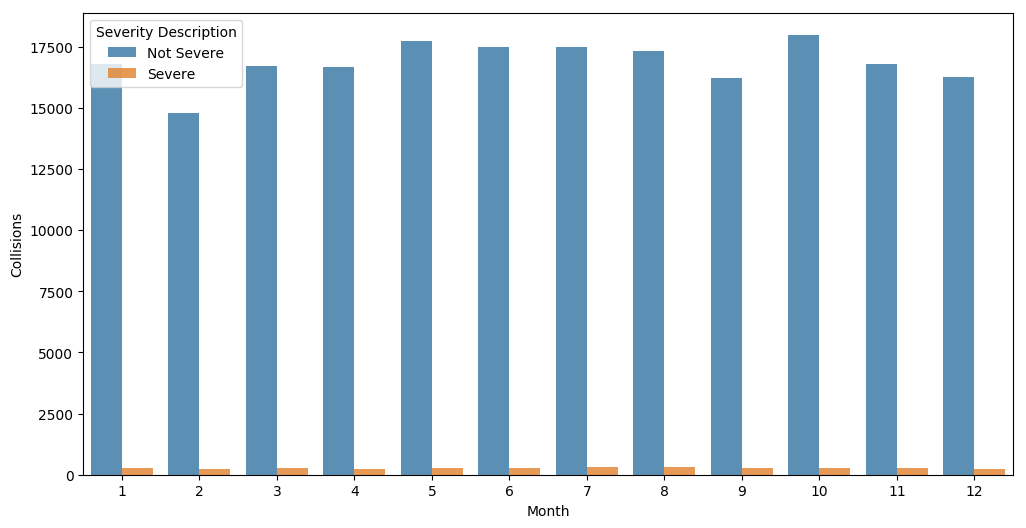

In [39]:
plt.figure(figsize=(12,6))
plt.figure(figsize=(12,6))
sns.countplot(hue='Severity Description',x='Month',data=df_binary,alpha=0.8)
plt.xlabel('Month')
plt.ylabel('Collisions')
plt.show()

Similar to year, the collisions across months follow the same trend as that for just the non-severe class. Below, we plot separate graphs for each severity level to better visualize the details. 

July and August seem to be distinctly higher than other months, both with 326 collisions, for the severe case followed by October and March. February and December witness relatively lower severe collisions, possibly due to lesser number of cars being on the road during those winter months.

For the non-severe cases, October sees the highest number of collisions (17,986) followed by May, June, July and August. This could be due to the summer months seeing the most amount of traffic. November to February see lesser occurrences while February sees the lowest rate similar to the severe cases. 

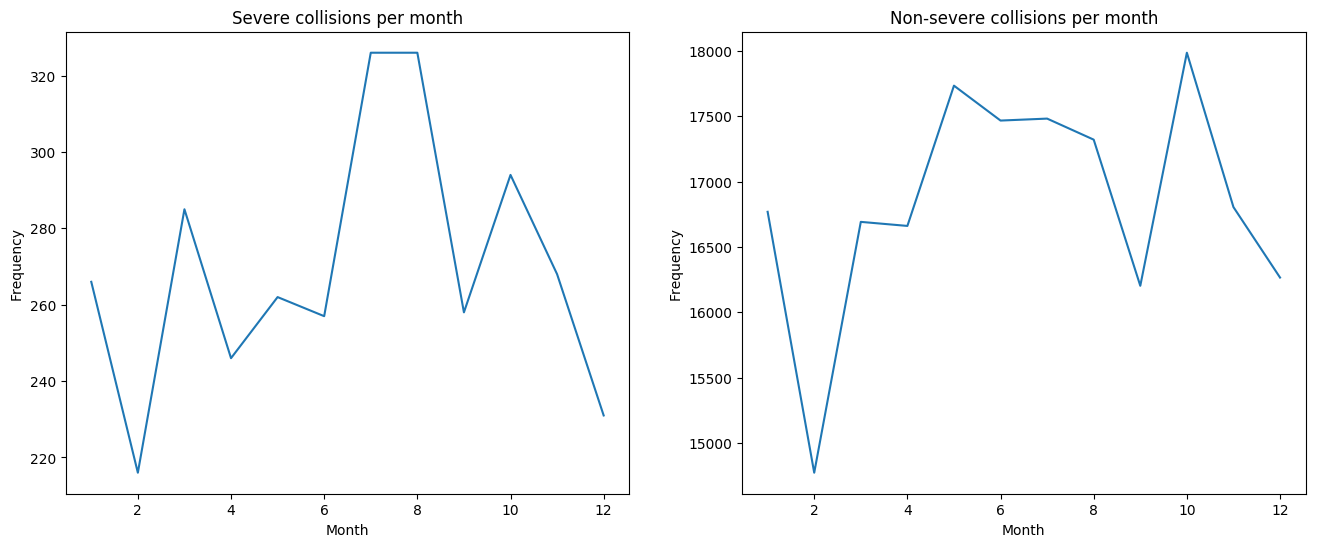

                       Latitude       
Severity Description Not Severe Severe
Month                                 
1                         16769    266
2                         14773    216
3                         16692    285
4                         16661    246
5                         17734    262
6                         17467    257
7                         17482    326
8                         17321    326
9                         16203    258
10                        17986    294
11                        16805    268
12                        16266    231


In [40]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
#sns.countplot(hue='Severity Description',x='Month',data=df_binary[df_binary['Severity Description']=='Severe'],alpha=0.8)
plt.plot(df_binary[df_binary['Severity Description']=='Severe']['Month'].value_counts().sort_index())
plt.ylabel('Frequency')
plt.xlabel('Month')
plt.title('Severe collisions per month')

plt.subplot(1,2,2)
#sns.countplot(hue='Severity Description',x='Month',data=df_binary[df_binary['Severity Description']=='Not Severe'],alpha=0.8)
plt.plot(df_binary[df_binary['Severity Description']=='Not Severe']['Month'].value_counts().sort_index())
plt.ylabel('Frequency')
plt.xlabel('Month')
plt.title('Non-severe collisions per month')


plt.show()

print (df_binary[['Month','Severity Description','Latitude']].groupby(['Month','Severity Description']).count().unstack())


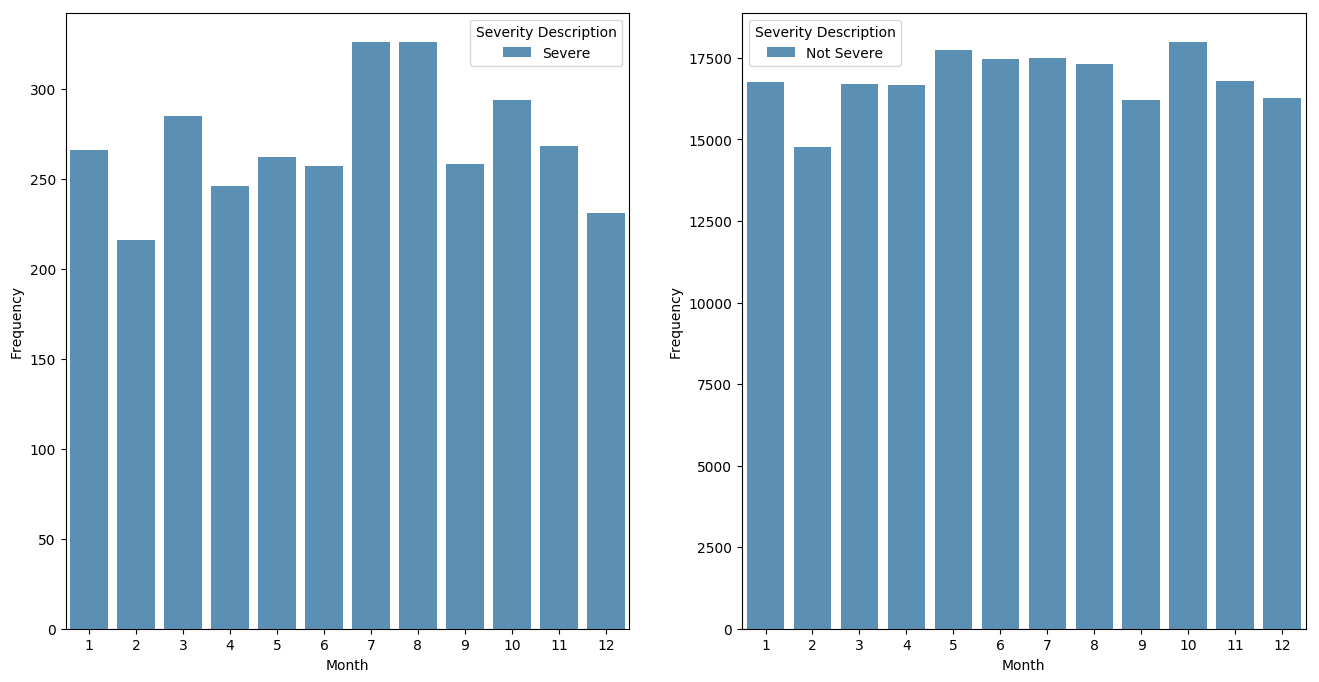

In [41]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(hue='Severity Description',x='Month',data=df_binary[df_binary['Severity Description']=='Severe'],alpha=0.8)
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.countplot(hue='Severity Description',x='Month',data=df_binary[df_binary['Severity Description']=='Not Severe'],alpha=0.8)
plt.ylabel('Frequency')

plt.show()

                       Latitude        Severe rate Not severe rate
Severity Description Not Severe Severe                            
Month                                                             
1                         16769    266    1.561491       98.438509
2                         14773    216    1.441057       98.558943
3                         16692    285    1.678742       98.321258
4                         16661    246    1.455019       98.544981
5                         17734    262    1.455879       98.544121
6                         17467    257    1.450011       98.549989
7                         17482    326    1.830638       98.169362
8                         17321    326    1.847339       98.152661
9                         16203    258    1.567341       98.432659
10                        17986    294    1.608315       98.391685
11                        16805    268    1.569730       98.430270
12                        16266    231    1.400255       98.59

<Figure size 1400x800 with 0 Axes>

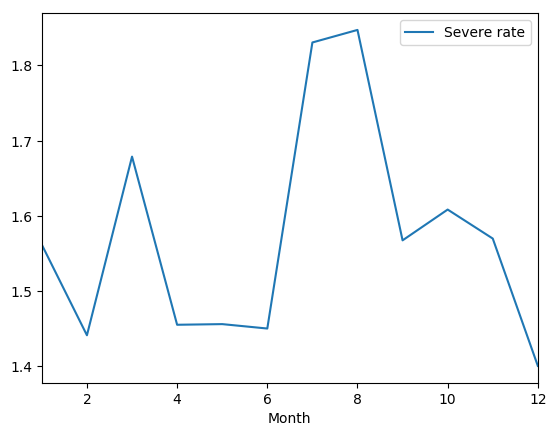

In [42]:
#Determining the severity rates
df_month = df_binary[['Month','Severity Description','Latitude']].groupby(['Month','Severity Description']).count().unstack()
df_month['Severe rate'] = df_month.apply(lambda x: (x[1]/(x[0]+x[1]))*100,axis=1)
df_month['Not severe rate'] = df_month.apply(lambda x: (x[0]/(x[0]+x[1]))*100,axis=1)
print (df_month)

plt.figure(figsize=(14,8))
df_month.plot(y='Severe rate')
plt.show()

From the above plots, these are the main points we can conclude: 
- April - June as well as the winter months of Feb and Dec see the lowest severe collisions
- July and August see higher severe collisions


### Hour vs Severity

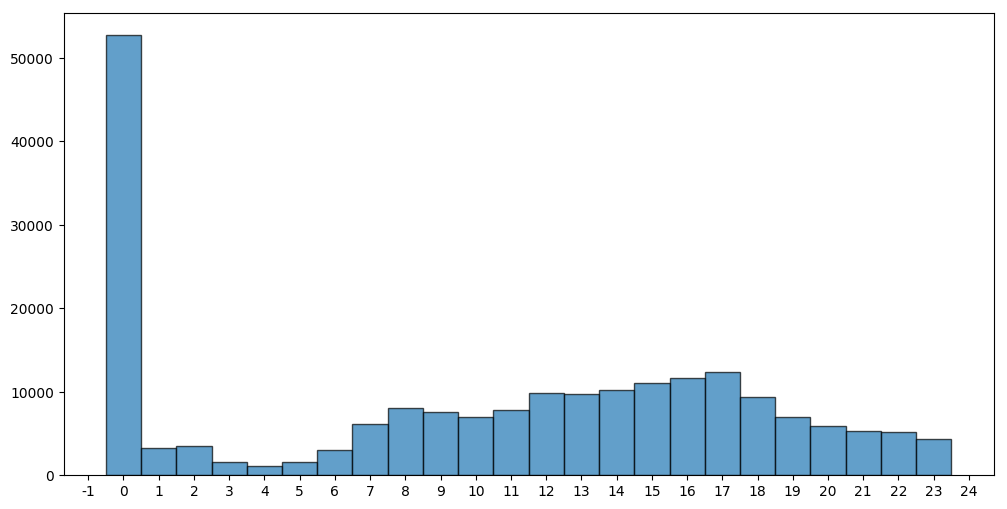

                       Latitude       
Severity Description Not Severe Severe
Hour                                  
0                         52119    585
1                          3201     96
2                          3369     83
3                          1533     41
4                          1128     30
5                          1514     34
6                          2966     80
7                          6061    121
8                          7933    107
9                          7485    106
10                         6935     95
11                         7662    114
12                         9692    133
13                         9646    136
14                        10009    159
15                        10858    169
16                        11434    204
17                        12166    233
18                         9131    206
19                         6822    103
20                         5836     99
21                         5233    122
22                       

In [43]:
plt.figure(figsize=(12,6))
plt.hist(df_binary['Hour'],range=(0,24),bins=24,alpha=0.7,edgecolor='black',align='left')
plt.xticks(range(-1,25),range(-1,25))
plt.show()

print (df_binary[['Hour','Severity Description','Latitude']].groupby(['Hour','Severity Description']).count().unstack())


From the hourly data, 12am clearly sees the highest number of collisions (52,119). After that hour, there is a small downward trend till about 4am which could be due to a decreasing rate of traffic during those hours. The hours between 4am to 8am sees a gradually increasing rate of collisions followed by a steady pattern till 11am. 

11am to 5pm sees another gradual increas in collisions followed by a downward trend till 11pm. The period between 5am and 5pm sees an increase in collisions possibly due to the higher rate of traffic during these hours. 

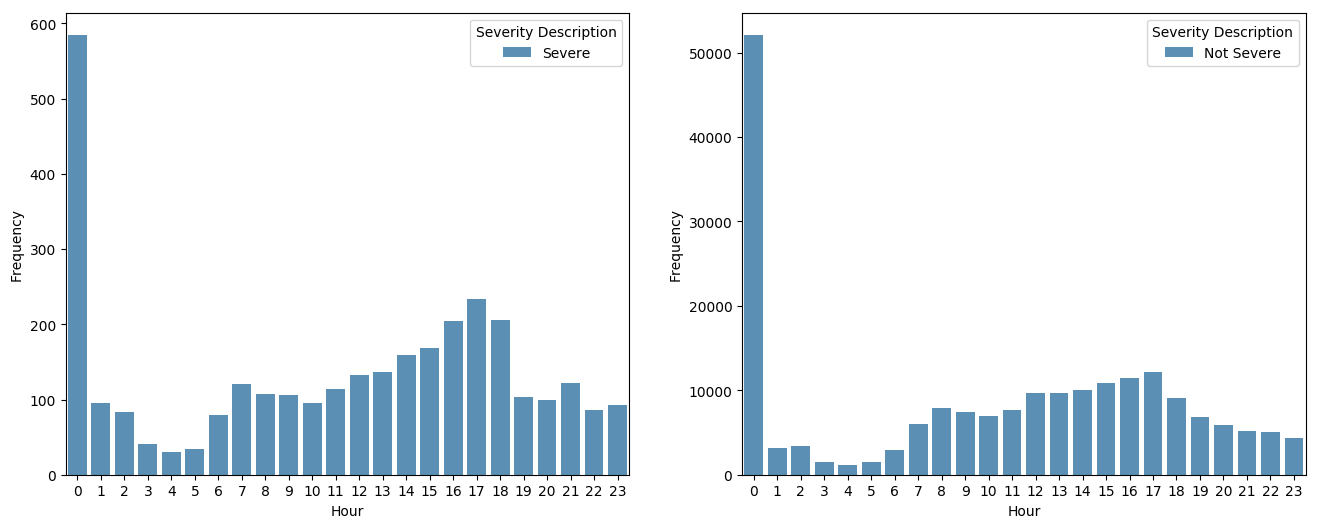

In [44]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(hue='Severity Description',x='Hour',data=df_binary[df_binary['Severity Description']=='Severe'],alpha=0.8)
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.countplot(hue='Severity Description',x='Hour',data=df_binary[df_binary['Severity Description']=='Not Severe'],alpha=0.8)
plt.ylabel('Frequency')

plt.show()

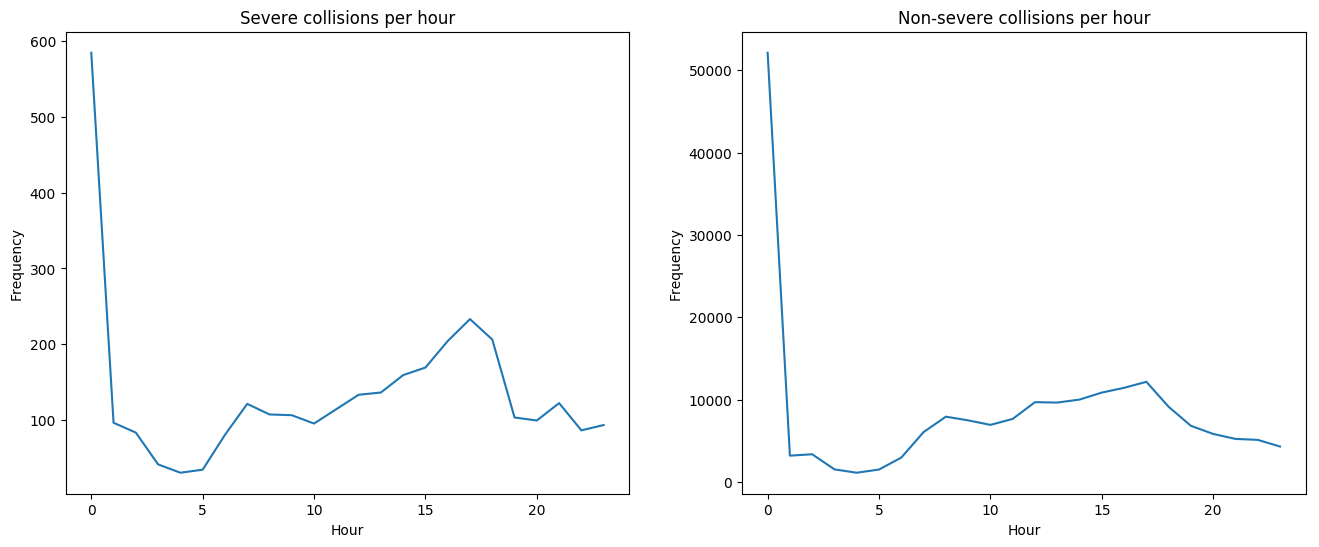

In [45]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
#sns.countplot(hue='Severity Description',x='Month',data=df_binary[df_binary['Severity Description']=='Severe'],alpha=0.8)
plt.plot(df_binary[df_binary['Severity Description']=='Severe']['Hour'].value_counts().sort_index())
plt.ylabel('Frequency')
plt.xlabel('Hour')
plt.title('Severe collisions per hour')

plt.subplot(1,2,2)
#sns.countplot(hue='Severity Description',x='Month',data=df_binary[df_binary['Severity Description']=='Not Severe'],alpha=0.8)
plt.plot(df_binary[df_binary['Severity Description']=='Not Severe']['Hour'].value_counts().sort_index())
plt.ylabel('Frequency')
plt.xlabel('Hour')
plt.title('Non-severe collisions per hour')


plt.show()

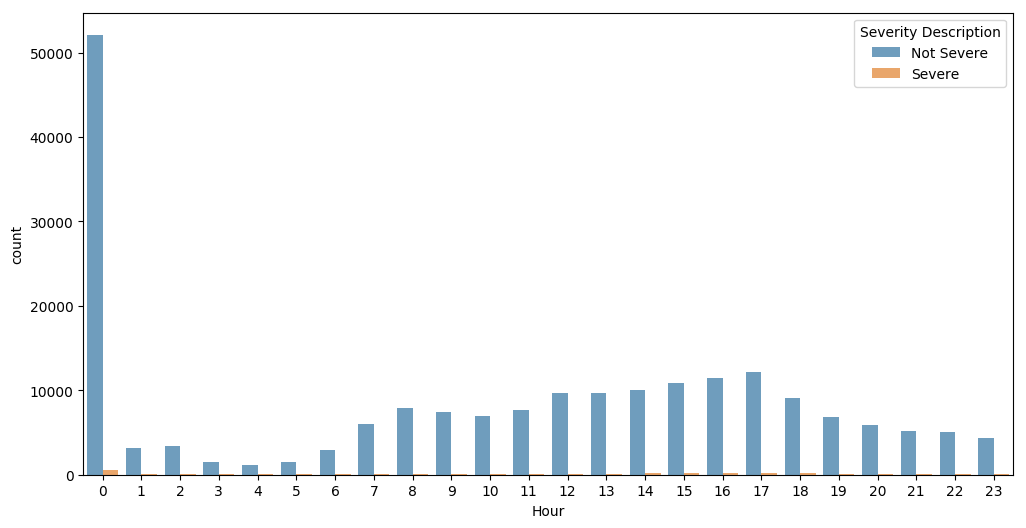

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(hue='Severity Description',x='Hour',data=df_binary,alpha=0.7)
plt.show()

In [47]:
print (df_binary[['Severity Description','Hour','Latitude']].groupby(['Hour','Severity Description']).count().unstack())

                       Latitude       
Severity Description Not Severe Severe
Hour                                  
0                         52119    585
1                          3201     96
2                          3369     83
3                          1533     41
4                          1128     30
5                          1514     34
6                          2966     80
7                          6061    121
8                          7933    107
9                          7485    106
10                         6935     95
11                         7662    114
12                         9692    133
13                         9646    136
14                        10009    159
15                        10858    169
16                        11434    204
17                        12166    233
18                         9131    206
19                         6822    103
20                         5836     99
21                         5233    122
22                       

                       Latitude        Severe rate Not severe rate
Severity Description Not Severe Severe                            
Hour                                                              
0                         52119    585    1.109973       98.890027
1                          3201     96    2.911738       97.088262
2                          3369     83    2.404403       97.595597
3                          1533     41    2.604828       97.395172
4                          1128     30    2.590674       97.409326
5                          1514     34    2.196382       97.803618
6                          2966     80    2.626395       97.373605
7                          6061    121    1.957295       98.042705
8                          7933    107    1.330846       98.669154
9                          7485    106    1.396390       98.603610
10                         6935     95    1.351351       98.648649
11                         7662    114    1.466049       98.53

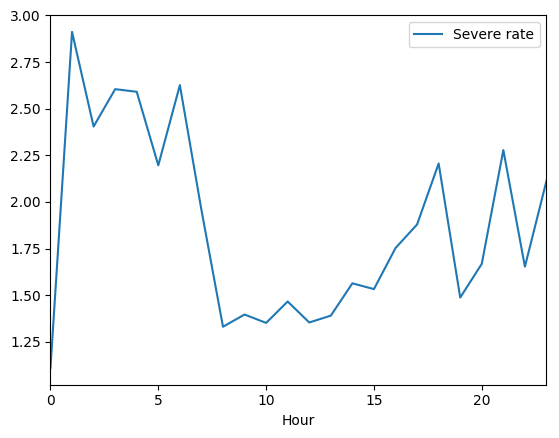

In [48]:
#Determining the severity rates
df_hour = df_binary[['Hour','Severity Description','Latitude']].groupby(['Hour','Severity Description']).count().unstack()
df_hour['Severe rate'] = df_hour.apply(lambda x: (x[1]/(x[0]+x[1]))*100,axis=1)
df_hour['Not severe rate'] = df_hour.apply(lambda x: (x[0]/(x[0]+x[1]))*100,axis=1)
print (df_hour)

df_hour.plot(y='Severe rate')
plt.show()

From the above graphs, it is unclear from the separate plots for severe and non-severe cases if certain hours see more severe collisions. 

However, when we plot the rate of severe collisions across hours, some trends clearly stand out. The hours between 1am and 6am see a higher rate of severe collisions. The case is similar for 4pm-6pm, 9pm and 11pm. Hence, between 4pm and 11pm, there is certainly an increasing trend in severe collision rate. 

Surprisingly the rate is the lowest at 12am. 

The hours between 8am and 3pm see the lowest severe collision rate which is somewhat expected since the light conditions tend to be the most ideal during this period. 

### Date vs Severity

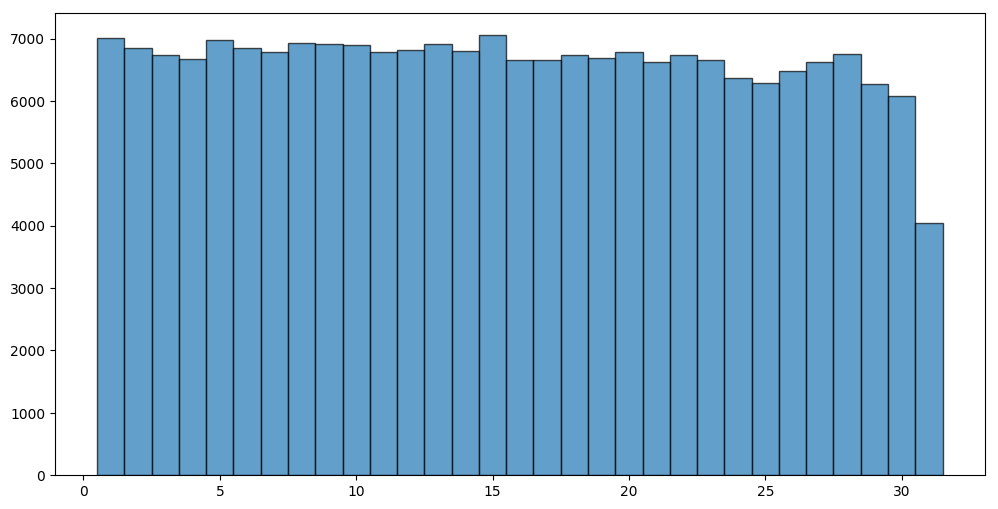

In [49]:
plt.figure(figsize=(12,6))
plt.hist(df_binary['Date'],range=(1,32),bins=31,alpha=0.7,edgecolor='black',align='left')
plt.show()

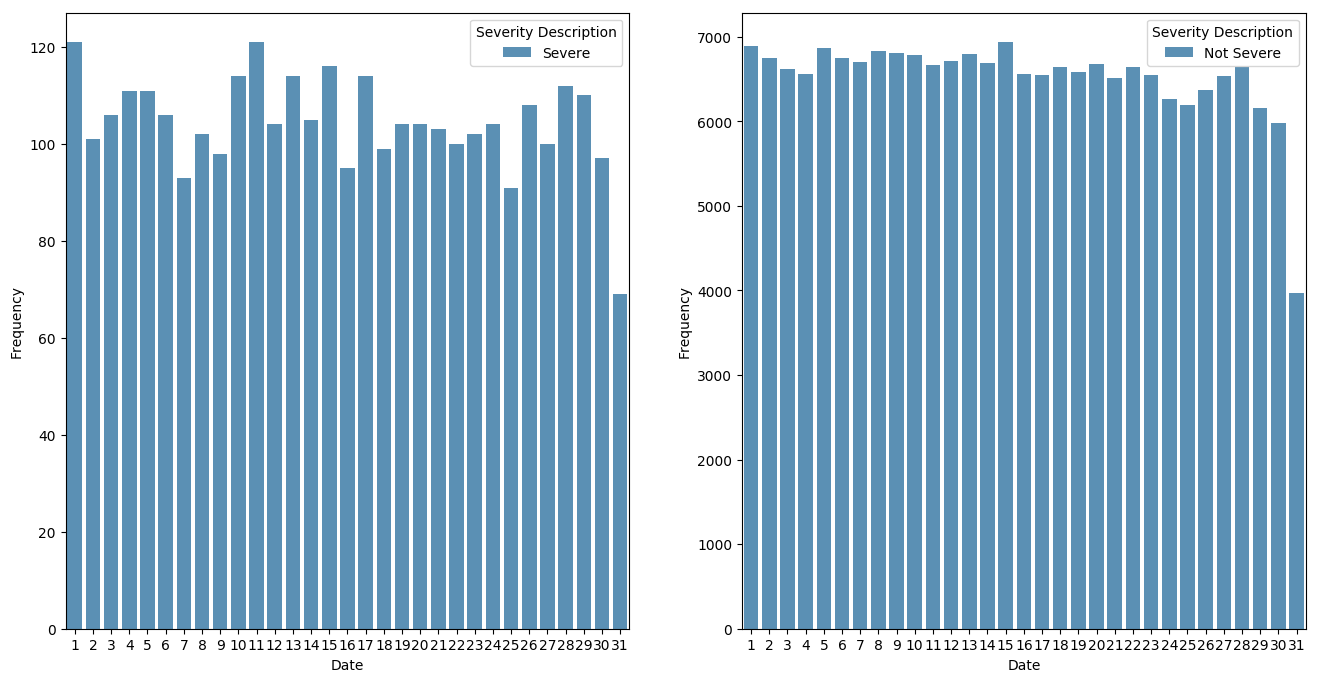

In [50]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(hue='Severity Description',x='Date',data=df_binary[df_binary['Severity Description']=='Severe'],alpha=0.8)
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.countplot(hue='Severity Description',x='Date',data=df_binary[df_binary['Severity Description']=='Not Severe'],alpha=0.8)
plt.ylabel('Frequency')

plt.show()

For the non-severe cases, as we have seen before, have the same trend as the overall distribution. Both these trends have a gradual decrease as we get more into the month. 

It's a similar trend for the severe cases but there is a lot more fluctuation throughout the month. If we ignore day 31 (does not exist for all months), the trend is somewhat flat or uniform. If anything, there is a very slight decreasing trend over time. 

To better visualize these differences, we conduct create moving average plots below. 

In [51]:
moving_avg = (df_binary[df_binary['Date']!=31][['Severity Description','Date','Latitude']].groupby(['Date','Severity Description']).count().unstack())
moving_avg

Latitude       
Severity Description Not Severe Severe
Date                                  
1                          6892    121
2                          6747    101
3                          6623    106
4                          6563    111
5                          6865    111
6                          6747    106
7                          6698     93
8                          6831    102
9                          6810     98
10                         6785    114
11                         6663    121
12                         6708    104
13                         6792    114
14                         6688    105
15                         6936    116
16                         6558     95
17                         6548    114
18                         6639     99
19                         6580    104
20                         6676    104
21                         6514    103
22                         6643    100
23                         6548    102
24                         6268    104
25                         6189     91
26                         6364    108
27                         6530    100
28                         6642    112
29                         6160    110
30                         5984     97

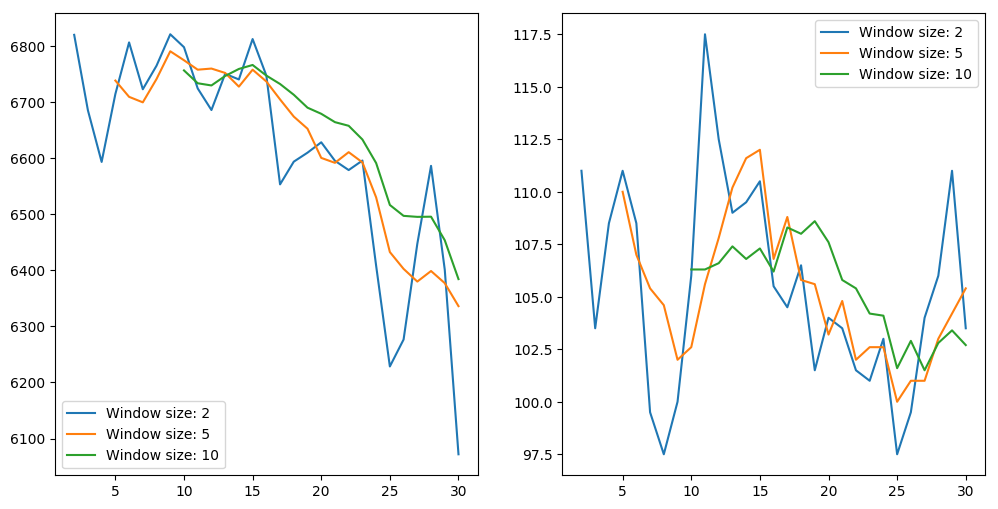

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(moving_avg[('Latitude','Not Severe')].rolling(2).mean(),label='Window size: 2')
plt.plot(moving_avg[('Latitude','Not Severe')].rolling(5).mean(),label='Window size: 5')
plt.plot(moving_avg[('Latitude','Not Severe')].rolling(10).mean(),label='Window size: 10')
plt.legend(loc='lower left')
plt.subplot(1,2,2)
plt.plot(moving_avg[('Latitude','Severe')].rolling(2).mean(),label='Window size: 2')
plt.plot(moving_avg[('Latitude','Severe')].rolling(5).mean(),label='Window size: 5')
plt.plot(moving_avg[('Latitude','Severe')].rolling(10).mean(),label='Window size: 10')
plt.legend(loc='upper right')

plt.show()

From the above plots, it can be seen that the downward trend for the non-severe case is much more pronounced with a higher moving average. The curve is smoother and has a distinct downward trend. 

For severe collisions, we can observe a general downward trend but a dip and then a rise between day 5 and 10 in the month. 

One way in which we can differentiate between the severity levels is by emphasizing the fact that the early days of the month see lesser severe collisions. 

### Day of the week vs Severity

In order to analyze the days of the week, we first need to extract them from the date and time information. We do this using the *to_datetime.weekday()* method of pandas. 

In [53]:
#Creating mapping of integers to day of the week
weekdays = {0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}

In [54]:
#df_binary['Day of the Week'] = df_binary['Incident Date and Time'].apply(lambda x: (pd.to_datetime(x)).weekday()).map(weekdays)
df_binary['Day of the Week'] = df_binary['Incident Date and Time'].apply(lambda x: (pd.to_datetime(x)).weekday())

In [55]:
df_binary['Day of the Week'].head()

0    2
1    6
2    0
3    3
5    4
Name: Day of the Week, dtype: int64

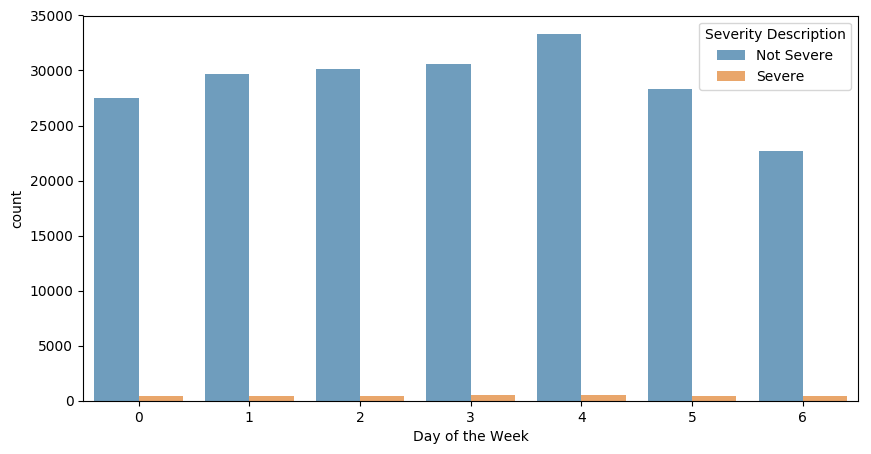

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(x='Day of the Week',hue='Severity Description',data=df_binary,alpha=0.7)

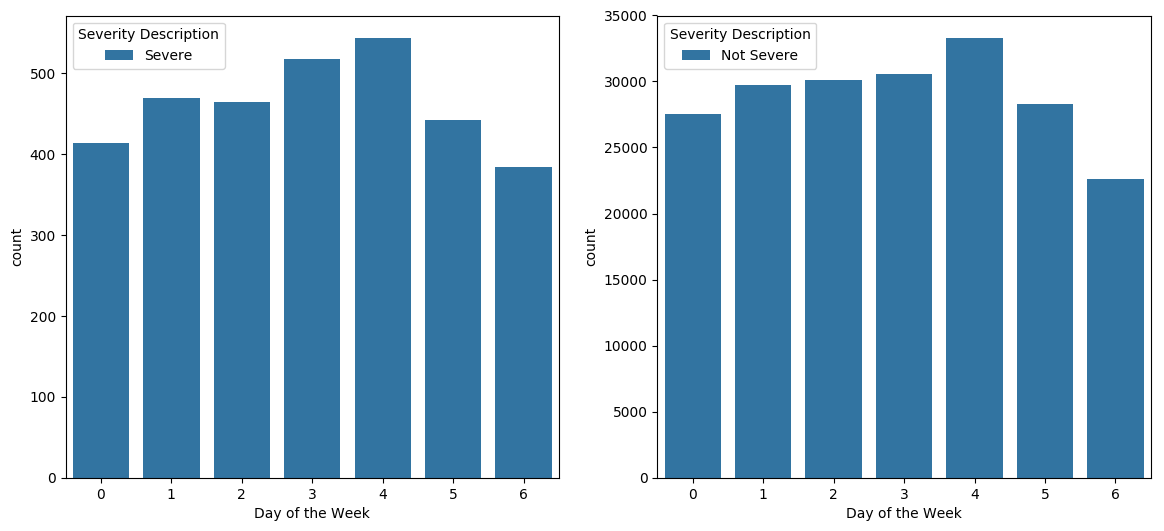

In [57]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(x='Day of the Week',hue='Severity Description',data=df_binary[df_binary['Severity Description']=='Severe'])
plt.subplot(1,2,2)
sns.countplot(x='Day of the Week',hue='Severity Description',data=df_binary[df_binary['Severity Description']=='Not Severe'])
plt.show()

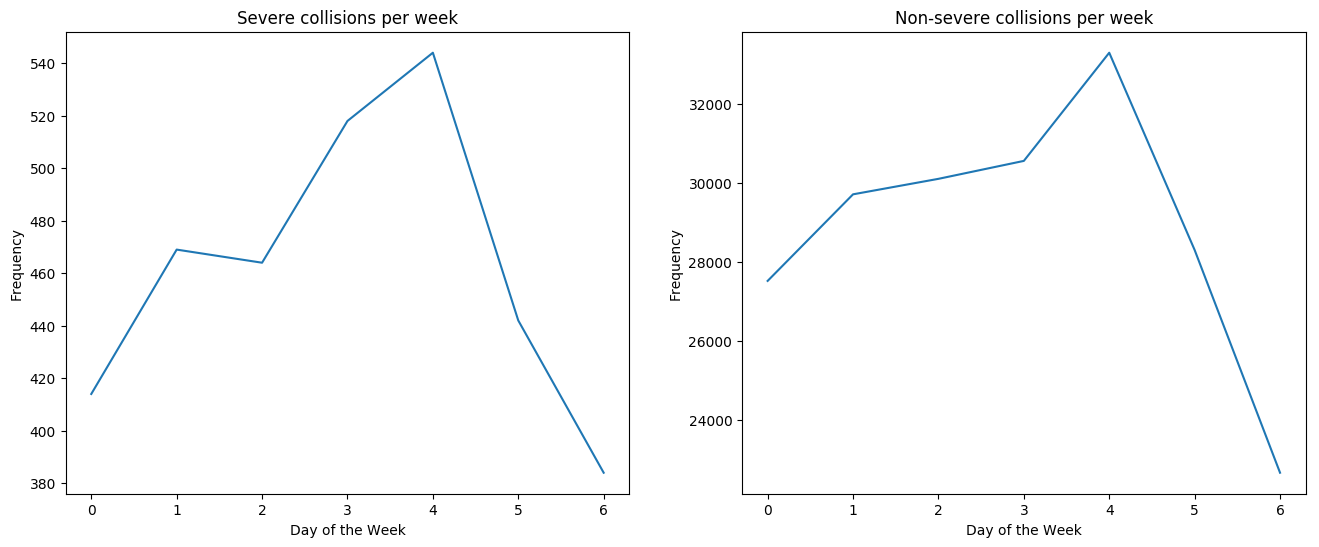

In [58]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
#sns.countplot(hue='Severity Description',x='Month',data=df_binary[df_binary['Severity Description']=='Severe'],alpha=0.8)
plt.plot(df_binary[df_binary['Severity Description']=='Severe']['Day of the Week'].value_counts().sort_index())
plt.ylabel('Frequency')
plt.xlabel('Day of the Week')
plt.title('Severe collisions per week')

plt.subplot(1,2,2)
#sns.countplot(hue='Severity Description',x='Month',data=df_binary[df_binary['Severity Description']=='Not Severe'],alpha=0.8)
plt.plot(df_binary[df_binary['Severity Description']=='Not Severe']['Day of the Week'].value_counts().sort_index())
plt.ylabel('Frequency')
plt.xlabel('Day of the Week')
plt.title('Non-severe collisions per week')


plt.show()

The trends for both severe and non-severe cases for day of the week is very similar. In both cases, Friday sees the highest amount of collisions while Sunday sees the lowest. Both of these stats make sense. As we progress through the week, the number of collisions increase gradually hitting the peak on Friday. 

In [2]:
df = pd.read_csv("completely_cleaned_dataset.csv",index_col=0)
df.head()

Longitude   Latitude   Status Address Type Severity Description  \
0 -122.292141  47.536087  Matched        Block           Not Severe   
1 -122.335422  47.598752  Matched        Block           Not Severe   
2 -122.331579  47.598746  Matched        Block           Not Severe   
3 -122.334188  47.571578  Matched        Block           Not Severe   
5 -122.337348  47.520472  Matched        Block           Not Severe   

  Collision Type  Number of People Involved  Number of Pedestrians Involved  \
0      Sideswipe                          2                               0   
1          Other                          1                               0   
2      Sideswipe                          2                               0   
3          Other                          2                               0   
5      Sideswipe                          2                               0   

   Number of Bicycles Involved  Number of Vehicles Involved  ...  Year  Month  \
0                            0                            2  ...  2018     12   
1                            0                            1  ...  2018     12   
2                            0                            2  ...  2018     12   
3                            0                            1  ...  2018     12   
5                            0                            2  ...  2018     12   

   Date Hour Minute Speed Road Congestion Road Length  Neighborhood  \
0    12   15     49  48.0         2.36674     0.56104      Riverton   
1    16    2     44  85.0        -1.00000     0.36276       Seattle   
2    17   13     26  13.0        -1.00000     0.36276       Seattle   
3    20    2     25  58.0         0.00000     1.73291       Seattle   
5    14   17     33  55.0         1.57819     0.74738  White Center   

  Num People Square  
0                 4  
1                 1  
2                 4  
3                 4  
5                 4  

[5 rows x 32 columns]

In [3]:
df.index = df['Incident Date and Time']

In [4]:
df = df.sort_index()
df.index = pd.to_datetime(df.index)

In [21]:
le = LabelEncoder()
df['Severity'] = le.fit_transform(df['Severity Description'])

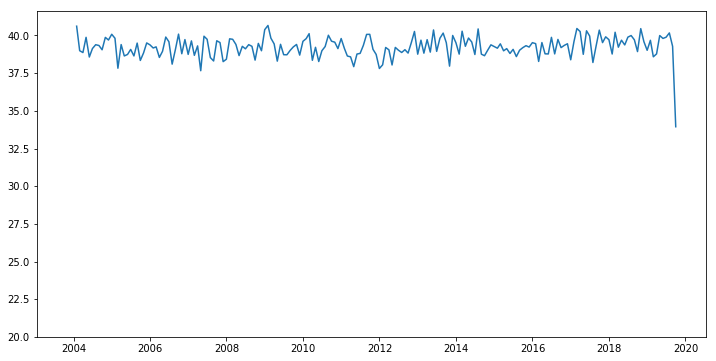

In [8]:
plt.figure(figsize=(12,6))
speed_resample = df['Speed'].resample('M').mean()
plt.plot(speed_resample,alpha=0.2)

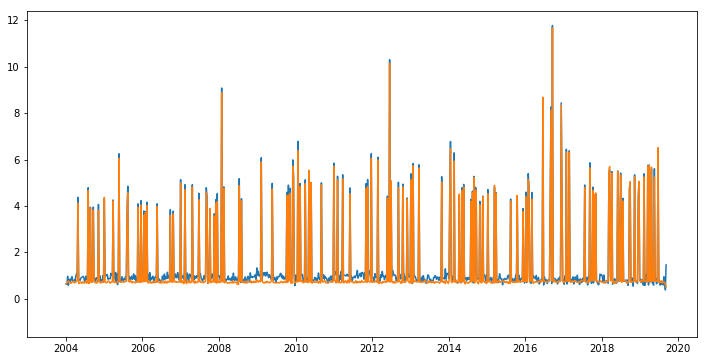

In [9]:
plt.figure(figsize=(12,6))
speed_resample = df['Road Congestion'].resample('W').mean()
plt.plot(speed_resample)
plt.plot(df['Road Length'].resample('W').mean())

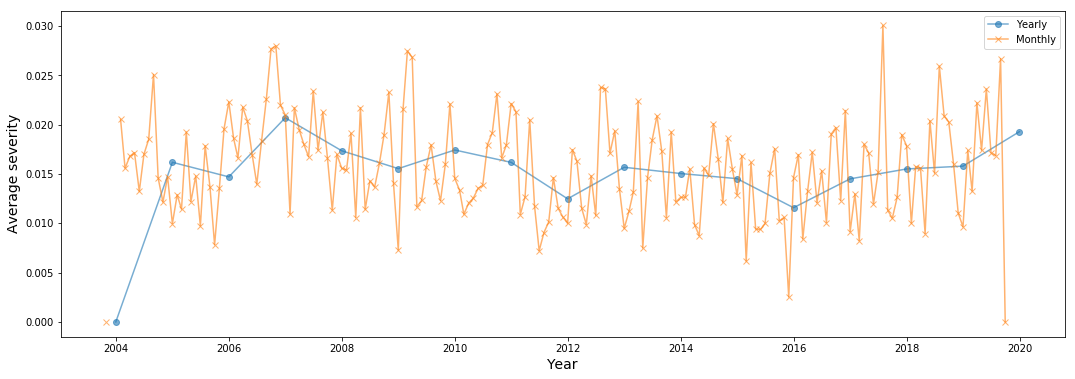

In [38]:
plt.figure(figsize=(18,6))
plt.plot(df['Severity'].resample('Y').mean(),alpha=0.6,marker='o',label='Yearly')
plt.plot(df['Severity'].resample('M').mean(),alpha=0.6,marker='x',label='Monthly')
#plt.plot(df['Severity'].resample('W').mean(),alpha=0.7,label='Weekly average')
plt.xlabel('Year',size=14)
plt.ylabel('Average severity',size=14)
plt.legend()

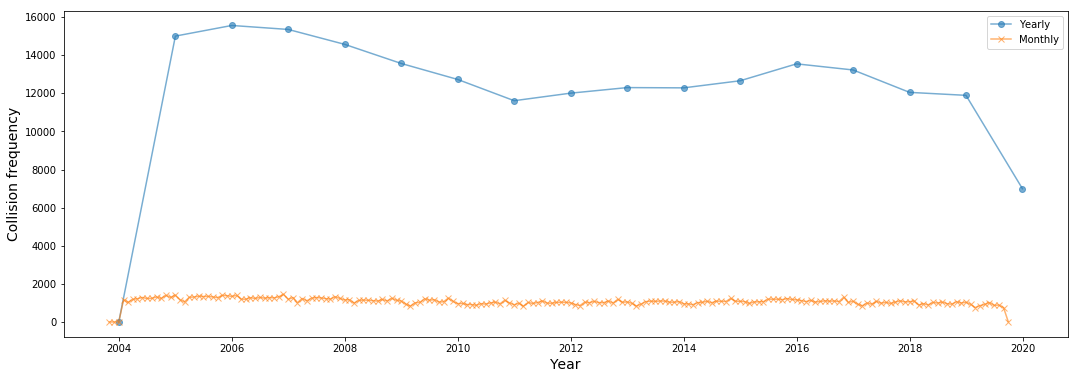

In [40]:
plt.figure(figsize=(18,6))
plt.plot(df['Severity'].resample('Y').count(),alpha=0.6,marker='o',label='Yearly')
plt.plot(df['Severity'].resample('M').count(),alpha=0.6,marker='x',label='Monthly')
#plt.plot(df['Severity'].resample('W').mean(),alpha=0.7,label='Weekly average')
plt.xlabel('Year',size=14)
plt.ylabel('Collision frequency',size=14)
plt.legend()

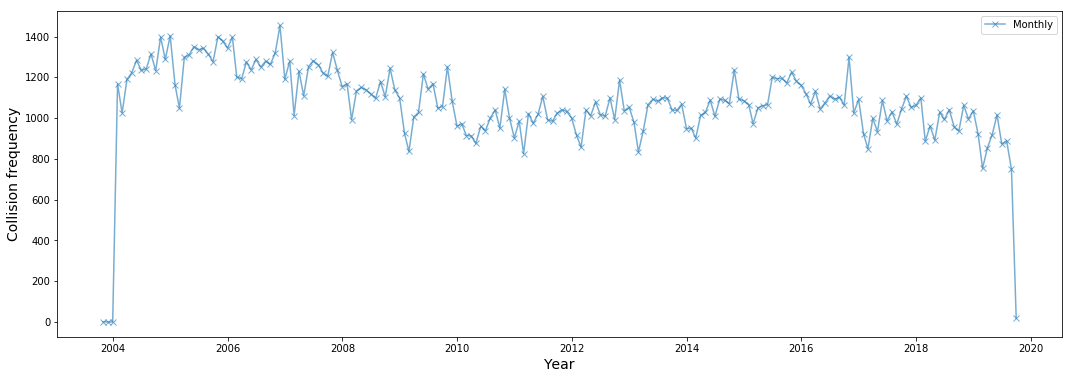

In [41]:
plt.figure(figsize=(18,6))
#plt.plot(df['Severity'].resample('Y').count(),alpha=0.6,marker='o',label='Yearly')
plt.plot(df['Severity'].resample('M').count(),alpha=0.6,marker='x',label='Monthly')
#plt.plot(df['Severity'].resample('W').mean(),alpha=0.7,label='Weekly average')
plt.xlabel('Year',size=14)
plt.ylabel('Collision frequency',size=14)
plt.legend()

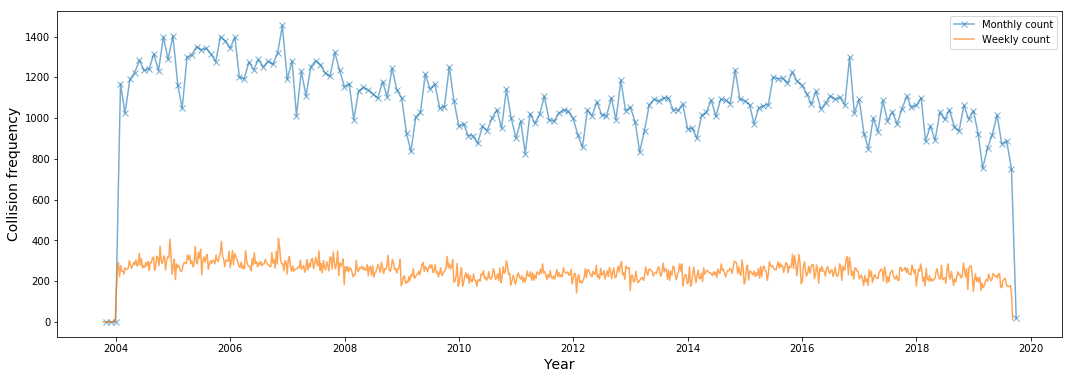

In [43]:
plt.figure(figsize=(18,6))
#plt.plot(df['Severity'].resample('Y').count(),alpha=0.6,marker='o',label='Yearly')
plt.plot(df['Severity'].resample('M').count(),alpha=0.6,marker='x',label='Monthly count')
plt.plot(df['Severity'].resample('W').count(),alpha=0.7,label='Weekly count')
plt.xlabel('Year',size=14)
plt.ylabel('Collision frequency',size=14)
plt.legend()

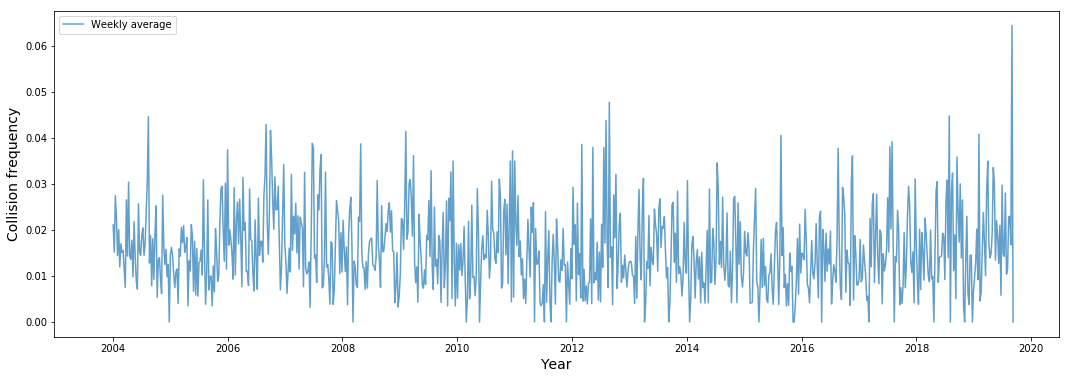

In [46]:
plt.figure(figsize=(18,6))
#plt.plot(df['Severity'].resample('Y').mean(),alpha=0.7,marker='o',label='Yearly average')
#plt.plot(df['Severity'].resample('M').mean(),alpha=0.7,marker='x',label='Monthly average')
plt.plot(df['Severity'].resample('W').mean(),alpha=0.7,label='Weekly average')
plt.xlabel('Year',size=14)
plt.ylabel('Collision frequency',size=14)
plt.legend()

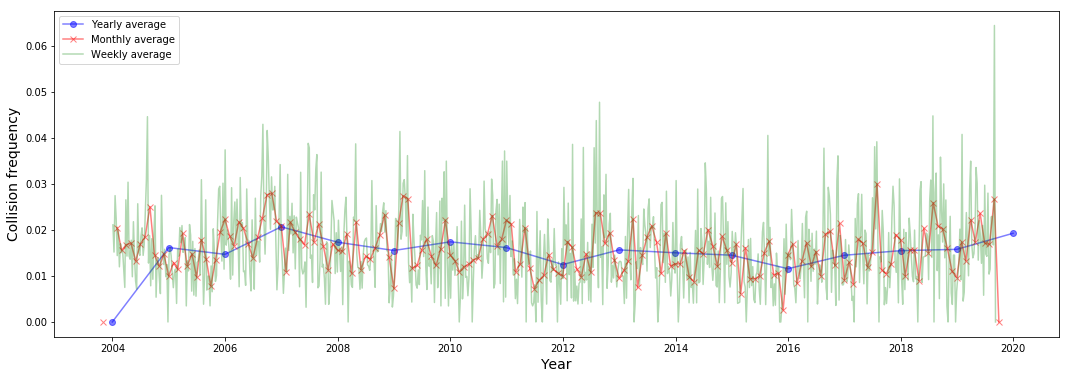

In [54]:
plt.figure(figsize=(18,6))
plt.plot(df['Severity'].resample('Y').mean(),alpha=0.5,marker='o',label='Yearly average',color='blue')
plt.plot(df['Severity'].resample('M').mean(),alpha=0.5,marker='x',label='Monthly average',color='red')
plt.plot(df['Severity'].resample('W').mean(),alpha=0.3,label='Weekly average',color='green')
plt.xlabel('Year',size=14)
plt.ylabel('Collision frequency',size=14)
plt.legend()